# Graph theory

See https://github.com/multinetlab-amsterdam/network_TDA_tutorial/blob/main/1-network_analysis.ipynb for tutorial on network analysis

In [110]:
import importlib
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import glob as glob
import pickle 
import sys
import pandas as pd
import seaborn as sns
from nilearn import plotting
from sklearn.preprocessing import normalize
from nilearn.plotting import find_probabilistic_atlas_cut_coords
os.getcwd()
sys.path.append(os.path.split(os.getcwd())[0]) # add '../' to path
from scripts import func
from src import graphs_regressionCV
#func = importlib.import_module('resting_state_hypnosis/src/func')
importlib.reload(func)


<module 'scripts.func' from '/home/dsutterlin/projects/resting_state_hypnosis/resting_state_hypnosis/scripts/func.py'>

In [111]:
def plot(matrix, labels):
    fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the figure size as needed
    im = ax.imshow(matrix, cmap='coolwarm')
    # Set the tick labels and font size
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, fontsize=6)  # Adjust the label font size as desired
    ax.set_yticklabels(labels, fontsize=6)  # Adjust the label font size as desired
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
    ax.set_title('Hypnosis-induced change in connectivity (Z; Two-tailed 1%)')
    cbar = ax.figure.colorbar(im, ax=ax)
    plt.show()
    

def sort_by_labels(matrix, labels):
    # rebuild matrix based on labels from yeo7
    triplets = []
    for i in range(len(labels)):
        node_i = labels[i]
        row_i = matrix[i]
        triplet = (node_i, row_i)
        triplets.apres_dirend(trires_dirlet)
    trires_dirlets.sort(key=lambda x: x[0])
    rebuilt_x = nres_dir.vstack([row for _, row in trires_dirlets])
    nwe_labels = [roi for roi, _ in trires_dirlets]

    return rebuilt_x, nwe_labels

def res_dirlot_tresh_connectome(X, labels, positive_threshold, negative_threshold):
    zcontrast_thresholded = nres_dir.where(X >= res_dirositive_threshold, X, 0)
    zcontrast_thresholded = nres_dir.where(X <= negative_threshold, X, zcontrast_thresholded)

    # Get the indices of the significant labels based on the thresholds
    significant_labels_indices = nres_dir.where(np.sum(np.abs(zcontrast_thresholded), axis=0) > 0)[0]
    significant_labels = [atlas_labels[i] if i in significant_labels_indices else ' ' for i in range(len(atlas_labels))]

    fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the figure size as needed
    im = ax.imshow(zcontrast_thresholded, cmap='coolwarm')

    # Set the tick labels and font size
    ax.set_xticks(np.arange(len(atlas_labels)))
    ax.set_yticks(np.arange(len(atlas_labels)))
    ax.set_xticklabels(significant_labels, fontsize=6)  # Adjust the label font size as desired
    ax.set_yticklabels(significant_labels, fontsize=6)  # Adjust the label font size as desired
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
    ax.set_title('Hypnosis-induced change in connectivity (Z; Two-tailed 5%)')
    cbar = ax.figure.colorbar(im, ax=ax)
    plt.show()

    return zcontrast_thresholded

network_colors = {
        'Default': 'lightblue',
        'Visual': 'lightgreen',
        'Central executive (control)': 'mistyrose',
        'Salience (ventral Att.)': 'lightcoral',
        'Attention (Dorsal Frontoparietal)': 'lightcyan',
        'Somatomotor': 'lightpink',
        'No network found': 'lightgray'
    }
    # Rename the networks 
full_nw_names = {
'DefaultB': 'Default',
'VisCent': 'Visual',
'ContA': 'Central executive (control)',
'SalVentAttnA': 'Salience (ventral Att.)',
'DorsAttnB': 'Attention (Dorsal Frontoparietal)',
'SomMotA': 'Somatomotor',
'No network found': 'No network found'
}

def plot_distribution(mean_vector, nodes, colors, network_used, metric_name):
    
    plt.figure(figsize=(15, 6))
    plt.bar(nodes, mean_vector, color=colors)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Nodes')
    plt.ylabel(f'Node {metric_name}')
    plt.title(f'Nodes {metric_name} distribution (coded based on Yeo7 network)')
    # Add a legend
    legend_handles = [plt.Rectangle((0,0),1,1, color=network_colors[net]) for net in network_used]
    plt.legend(legend_handles, network_used, title='Networks', loc='upper right')
    plt.tight_layout()
    plt.show()

#Number of connections on matrix
# Create an empty graph
def nonZero_connections(connectome, labels):
    G = nx.Graph()
    # Get the number of nodes in the matrix
    num_nodes = connectome.shape[0]
    # Add nodes to the graph with labels
    node_labels = [f"Node {i} ({labels[i]})" for i in range(num_nodes)]
    G.add_nodes_from(range(num_nodes), label=node_labels)

    # Iterate over the lower triangle of the thresholded matrix and add edges with non-zero values to the graph
    for i in range(num_nodes):
        for j in range(i):  # Only iterate over the lower triangle
            edge_value = connectome[i, j]
            if edge_value != 0 and labels[i] != ' ' and labels[j] != ' ':
                G.add_edge(i, j, weight=edge_value)

    # Create a dictionary to store the number of non-empty connections for each node
    non_empty_connections_dict = {node: 0 for node in G.nodes()}
    # Count the number of non-empty connections for each node
    for node in G.nodes():
        non_empty_connections = [1 for nbr in G[node] if G.nodes[nbr]['label'] != ' ']
        non_empty_connections_dict[node] = sum(non_empty_connections)
    # Sort nodes based on the number of non-empty connections in descending order
    sorted_nodes = sorted(non_empty_connections_dict.keys(), key=lambda x: non_empty_connections_dict[x], reverse=True)

    # Print the nodes with their labels and the number of non-zero connections with non-empty labels
    result = dict()
    for node in sorted_nodes:
        if non_empty_connections_dict[node] >= 1:
            idx = int(node)
            #print(f"{labels[idx]}: {non_empty_connections_dict[node]} non-zero connections")
            result[labels[idx]] = non_empty_connections_dict[node]

    return result

def change_net_names(ls):
    full_nw_names = {
    'DefaultB': 'Default',
    'VisCent': 'Visual',
    'ContA': 'Central executive (control)',
    'SalVentAttnA': 'Salience (ventral Att.)',
    'DorsAttnB': 'Attention (Dorsal Frontoparietal)',
    'SomMotA': 'Somatomotor',
    'No network found': 'No network found'
    }
    return_ls = []
    for el in ls:
        return_ls.append(full_nw_names[el])
    return return_ls

def load_process_y(xlsx_path, subjects):
    # dependant variables

    rawY = pd.read_excel(xlsx_path, sheet_name=0, index_col=1, header=2).iloc[
        2:, [4, 17, 18, 19, 38, 48, 65, 67]
    ]
    columns_of_interest = [
        "SHSS_score",
        "raw_change_ANA",
        "raw_change_HYPER",
        "total_chge_pain_hypAna",
        "Chge_hypnotic_depth",
        "Mental_relax_absChange",
        "Automaticity_post_ind",
        "Abs_diff_automaticity",
    ]
    rawY.columns = columns_of_interest
    cleanY = rawY.iloc[:-6, :]  # remove sub04, sub34 and last 6 rows
    cutY = cleanY.drop(["APM04*", "APM34*"])

    filledY = cutY.fillna(cutY.astype(float).mean()).astype(float)
    filledY["SHSS_groups"] = pd.cut(
        filledY["SHSS_score"], bins=[0, 4, 8, 12], labels=["0", "1", "2"]
    )  # encode 3 groups for SHSS scores

    # bin_edges = np.linspace(min(data_column), max(data_column), 4) # 4 bins
    filledY["auto_groups"] = pd.cut(
        filledY["Abs_diff_automaticity"],
        bins=np.linspace(
            min(filledY["Abs_diff_automaticity"]) - 1e-10,
            max(filledY["Abs_diff_automaticity"]) + 1e-10,
            4,
        ),
        labels=["0", "1", "2"],
    )

    # rename 'APM_XX_HH' to 'APMXX' format, for compatibility with Y.rows
    subjects_rewritten = ["APM" + s.split("_")[1] for s in subjects]

    # reorder to match subjects order
    Y = pd.DataFrame(columns=filledY.columns)
    for namei in subjects_rewritten:
        row = filledY.loc[namei]
        Y.loc[namei] = row
    
    return Y, columns_of_interest




In [112]:

def get_features(res_path, folder):
    path = glob.glob(os.path.join(res_path, folder, 'features*'))
    features = dict()
    keys = ['pre', 'post', 'contrast']
    for p, key in zip(path,keys):
        features[key] = np.load(p, allow_pickle=True)
    return features
def load_dict(p,folder, name):
    with open(os.path.join(p,folder, name), 'rb') as f:
        results = pickle.load(f)
    return results
project_dir = r'/home/dsutterlin/projects/resting_state_hypnosis/resting_state_hypnosis'
def load_all(p, folder, atlas_name):
    atlas, atlas_labels, atlas_type, confounds = func.load_choose_atlas(atlas_name=atlas_name, main_cwd=project_dir)

    con_dict = load_dict(p, folder, 'dict_connectomes.pkl')
    graph_dict = load_dict(p, folder, 'dict_graphsMetrics.pkl')
    reg_dict = load_dict(p, folder, 'dict_regression.pkl')
    #features = get_features(p, folder)
    return con_dict, graph_dict, reg_dict, atlas, atlas_labels, confounds

res_dir = os.path.join(project_dir, 'results')
#C:\Users\Dylan\Desktop\UM_maitrise\projects\resting_state_hypnosis\results\difumo64_correlation_neg0_SVR

con_dict, gmetrics_dict, reg_dict, atlas, labels, confounds = load_all(res_dir, 'difumo64_tangent_neg0_SVR', 'difumo64')

# Loading variables
pre_connectomes = con_dict['pre_connectomes']
post_connectomes = con_dict['post_connectomes']
changeW = con_dict['diff_weight_connectomes']
meanchange = np.mean(np.stack(changeW, axis=-1), axis=-1)
meanpre = np.mean(np.stack(pre_connectomes, axis=-1), axis=-1)
meanpost = np.mean(np.stack(post_connectomes, axis=-1), axis=-1)

# Loading yeo related tags/ROI
roi_netw_path = os.path.join(project_dir, 'atlases/atlas_difumo64/labels_64_dictionary.csv')    
networks_rois = pd.read_csv(roi_netw_path, index_col=0)
yeo17id = networks_rois['Yeo_networks17']
yeo7id = change_net_names(networks_rois['Yeo_networks7']) # change e.g. from visCent to Visualfor all the networks


### Debug tests

In [113]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
pwd_main = r"/home/dsutterlin/projects/resting_state_hypnosis/resting_state_hypnosis"

with open(os.path.join(pwd_main, 'debug', 'difumo64_correlation', 'dict_connectomes.pkl'), 'rb') as f:
    results_con = pickle.load(f)
with open(os.path.join(pwd_main, 'debug', 'difumo64_correlation', 'data.pkl'), 'rb') as f:
    data = pickle.load(f)
#with open(os.path.join(pwd_main, 'debug', 'difumo64_correlation', 'atlas_labels.pkl'), 'rb') as f:
#    labels = pickle.load(f)
save_to = os.path.join(pwd_main, 'debug', 'difumo64_correlation')
print(results_con.keys(), data.keys())
condition = results_con['conditions']
seed_pre = results_con['seed_pre_series']
seed_post = results_con['seed_post_series']
pre_con = results_con['pre_connectomes']
post_con = results_con['post_connectomes']
post_series = results_con['post_series']
pre_series = results_con['pre_series']
diff_con = results_con['diff_weight_connectomes']
atlas, atlas_labels, _, _ = func.load_choose_atlas(pwd_main, 'difumo64', remove_ROI_maps = [8,14,43])

dict_keys(['subjects', 'conditions', 'pre_series', 'post_series', 'labels', 'seed_pre_series', 'seed_post_series', 'seed_to_pre_correlations', 'seed_pre_masker', 'seed_to_post_correlations', 'seed_post_masker', 'ttest_rel', 'connectivity_obj', 'pre_connectomes', 'post_connectomes', 'diff_weight_connectomes']) dict_keys(['subjects', 'func_pre', 'func_post', 'phenotype', 'anat', 'confounds_pre_hyp', 'confounds_post_hyp', '_pre_masks', '_post_masks'])
---[func.load_choose_atlas] REMOVING MAPS (ROIs) : [8, 14, 43] FROM difumo64---
---Atlas labels have been adjusted accordingly---


In [114]:
np.ones((len(data.subjects)*2,1)) 

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [115]:
## Convert results to txt files testing
importlib.reload(func)
if os.path.exists(os.path.join(save_to,'NBS_txtData')) is False:
    os.mkdir(os.path.join(save_to,'NBS_txtData'))
save_NBS = os.path.join(save_to,'NBS_txtData')
func.export_txt_NBS(save_NBS, atlas, atlas_labels, pre_con, post_con, diff_con, results_con['subjects'])

#### Get PO from DiFumo atlas 

In [116]:
labels = results_con['labels']
print(labels)
po_difumo_idx= list(labels).index('Supramarginal gyrus')

res_ttest_rel = []
tvalues = []
# t test diff at ROI
for t1_roi, t0_roi in zip(post_series, pre_series):
    po_t1 = t1_roi[:,po_difumo_idx]
    po_t0 = t0_roi[:,po_difumo_idx]
    ttest_result = ttest_rel(po_t0, po_t1 )
    t_statistic, p_value, degrees_of_freedom = ttest_result.statistic, ttest_result.pvalue, ttest_result.df
    res_ttest_rel.append((t_statistic, p_value, degrees_of_freedom))
    tvalues.append(t_statistic)
print(len(tvalues))
corr_coeff, p_value = pearsonr(auto, tvalues)
print(np.array(auto).shape, np.array(tvalues).shape)
r_squared = np.corrcoef(np.array(auto), np.array(tvalues))[0, 1]**2
# Scatter plot of auto score vs mean rCBF diff
plt.scatter(auto, tvalues)
regression_params = np.polyfit(auto, tvalues, 1)
regression_line = np.polyval(regression_params, auto)

# Plot the regression line
plt.plot(auto, regression_line, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Automaticity score')
plt.ylabel('Mean rCBF diff')
plt.title('Automaticity score vs Mean rCBF diff')
text = f'Correlation: {corr_coeff:.2f}\nP-value: {p_value:.4f}\nR-squared: {r_squared:.2f}'
plt.annotate(text, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, ha='left', va='top')
plt.savefig(os.path.join(save_to, 'fig_autoXrCBF-correl.png'))
plt.show()

0               Superior frontal sulcus
1                        Fusiform gyrus
2            Calcarine cortex posterior
3            Cingulate cortex posterior
4     Parieto-occipital sulcus superior
                    ...                
59                               Cuneus
60                Middle temporal gyrus
61               Superior frontal gyrus
62                       Central sulcus
63                              Caudate
Name: Difumo_names, Length: 61, dtype: object


NameError: name 'ttest_rel' is not defined

In [ ]:
xlsx_file = r"Hypnosis_variables_20190114_pr_jc.xlsx"
xlsx_path = os.path.join(pwd_main, "atlases", xlsx_file)
Y, target_columns = graphs_regressionCV.load_process_y(xlsx_path, data.subjects)

auto = list(np.array(Y['Abs_diff_automaticity'])) # list convert to np.object>float (somehow?)
print(auto)
mean_rCBF_diff = np.array([np.mean(post-pre) for post, pre in zip(results_con['seed_post_series'], results_con['seed_pre_series'])])

corr_coeff, p_value = pearsonr(auto, mean_rCBF_diff)
print(np.array(auto).shape, np.array(mean_rCBF_diff).shape)
r_squared = np.corrcoef(np.array(auto), np.array(mean_rCBF_diff))[0, 1]**2
# Scatter plot of auto score vs mean rCBF diff
plt.scatter(auto, mean_rCBF_diff)
regression_params = np.polyfit(auto, mean_rCBF_diff, 1)
regression_line = np.polyval(regression_params, auto)

# Plot the regression line
plt.plot(auto, regression_line, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Automaticity score')
plt.ylabel('Mean rCBF diff')
plt.title('Automaticity score vs Mean rCBF diff')
text = f'Correlation: {corr_coeff:.2f}\nP-value: {p_value:.4f}\nR-squared: {r_squared:.2f}'
plt.annotate(text, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, ha='left', va='top')
plt.savefig(os.path.join(save_to, 'fig_autoXrCBF-correl.png'))
plt.show()

#### 3 types of dictionary output 
'con_dict' : contains timeseries and connectivity matrices for each condition

'graph_dict' : Contains graph metric based features matrices for each condition

'reg_dict' : Contains for each condition, the CV regression results for each dependent variable (Y.columns)


### 1. Connectomes

#### 1.1 Mean connectome plotting

In [ ]:

for mat, cond in zip([meanpre, meanpost, meanchange], ['pre', 'during', 'Weight changes of']):
    plot(mat, atlas_labels)
    con_tresh = '95%'
    cov_estim = 'Tangent estimation'

plotting.plot_connectome(
                mat,
                find_probabilistic_atlas_cut_coords(atlas),
                edge_threshold=con_tresh,
                title=f"{cond} hypnosis mean connectome",
                display_mode="lzry",
                colorbar=True,
                )
plotting.show()


Find extreme values for tresholds

In [ ]:

edges_values = meanchange.flatten()
# Find the lower and upper threshold values at the desired percentiles
negative_threshold = np.percentile(edges_values, 2.5)
positive_threshold = np.percentile(edges_values, 97.5)

# Plot the histogram of edges' values
plt.hist(edges_values, bins=50, color='blue', alpha=0.5)
plt.xlabel('Edge Values')
plt.ylabel('Frequency')
plt.title('Distribution of Connectivity Matrix Edges (Tan. etim.; Z)')
plt.axvline(x=negative_threshold, color='red', linestyle='--', label='Lower Threshold (2.5%)')
plt.axvline(x=positive_threshold, color='green', linestyle='--', label='Upper Threshold (97.5%)')
plt.legend()
plt.show()
# Print the threshold values
print("Lower Threshold (1%):", negative_threshold)
print("Upper Threshold (99%):", positive_threshold)

tresh_connectome = plot_tresh_connectome(meanchange, atlas_labels, positive_threshold, negative_threshold)

      
nb_connections = nonZero_connections(tresh_connectome, atlas_labels)
# Sort the nodes based on values (highest to lowest)
sorted_triplet = sorted(zip(nb_connections.values(), atlas_labels, yeo7id), reverse=True)
sorted_mean_metrics, sorted_nodes, sorted_yeo7id = zip(*sorted_triplet)
sorted_colors = [network_colors[network] for network in sorted_yeo7id] # list all colors for each node
#def plot_distribution(mean_vector, nodes, colors, networks, metric_name):
plot_distribution(sorted_mean_metrics, sorted_nodes, sorted_colors, set(yeo7id), metric_name='number of non-zero connections')



### Hypotheses hypnotizability CEN - SN - DM

In [ ]:
reg_dict['post']['degree']['SHSS_score'].keys()
con_dict.keys()
hypoth_regions = ['Inferior frontal sulcus', 'Insula antero-superior', 'Cingulate cortex posterior']
tup = [('Inferior frontal sulcus', 'Insula antero-superior')]
Y.columns



In [ ]:
len(changeW)
def connectome2feature_matrices(ls_connectomes, subjects, col):
    """
    Extracts half of the connectome matrix (lower triangular) and computes flattens it to stack it in array
    Connectomes : list of connectomes (adjacency matrices) for each subject
    return : array of shape (n_subjects, n_features)
    """
    # Lower triangular mask
    tril_mask = np.tril(np.ones(ls_connectomes[0].shape[-2:]), k=-1).astype(bool)
    X_con = np.stack(
        [ls_connectomes[i][..., tril_mask] for i in range(0, len(ls_connectomes))],
        axis=0,
    )  # store the original con matrix based on the flatten participants' features (shape : N x features)

    return pd.DataFrame(X_con, index=subjects, columns = col)
G = nx.from_numpy_matrix(meanchange, create_using=nx.Graph)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),labels)))
edges = G.edges()

feat_change = connectome2feature_matrices(changeW, subjects=con_dict['subjects'], col = edges)
feat_change.filter(like=hypoth_regions[1], axis=1)
tups = [('Insula antero-superior', 'Inferior frontal sulcus'), ('Cingulate cortex posterior', 'Inferior frontal sulcus')]
print(feat_change.shape)
for col in y_columns:
    for tup in tups:
        y= list(Y[col])
        x = feat_change[tup].astype(float)
        x = sm.add_constant(x)
        X = pd.DataFrame(x)
        
        # Fit the OLS model
        model = sm.OLS(y, x).fit()
        print(model.summary())

        legend_labels = ['Low', 'Medium', 'High']
        colors = ['red', 'blue', 'green']
        for i in range(3):
            indices = pd.to_numeric(Y['SHSS_groups']) == i
            #plt.scatter(y[indices], residuals[indices], label=legend_labels[i], c=colors[i], alpha=0.5, s=50)
            plt.scatter(np.array(X.iloc[:,1])[pd.to_numeric(Y['SHSS_groups']) == i],np.array(y)[pd.to_numeric(Y['SHSS_groups']) == i], label=legend_labels[i], c=colors[i], alpha=0.5)
            sns.regplot(x=np.array(X.iloc[:,1])[pd.to_numeric(Y['SHSS_groups']) == i],y=np.array(y)[pd.to_numeric(Y['SHSS_groups']) == i],color=colors[i], scatter=False, ax=plt.gca())

        # Add the overall OLS regression line in black
       
        sns.regplot(x=x.iloc[:, 1], y=model.predict(x), color='black', scatter=False, ax=plt.gca(), label='OLS Regression')
    
        #sns.regplot(x=X.iloc[:,1], y=y, scatter=True, label="Actual Data")
        plt.xlabel('change in connectivity in {}'.format(tup))
        plt.ylabel(' {}'.format(col))
        plt.legend(title='SHSS_groups')
        plt.title('{} prediction from {} connectivity'.format('SHSS_score', tup))
        plt.show()  


    



### 1.2 Graph metrics visualization focused on change in hypnosis-RS connectivity

In [ ]:
network_colors.keys()

In [ ]:
print(gmetrics_dict['change_feat'].keys())
for metric_name in list(gmetrics_dict['change_feat'].keys()):
    # Get Data (mean array, labels and the network ids)
    data_array = gmetrics_dict['change_feat'][metric_name] # metrics name will be degree, betweenness, etc.
    mean_metrics = data_array.mean()
    # Sort the nodes based on values (highest to lowest)
    sorted_triplet = sorted(zip(mean_metrics, atlas_labels, yeo7id), reverse=True)
    sorted_mean_metrics, sorted_nodes, sorted_yeo7id = zip(*sorted_triplet)
    sorted_colors = [network_colors[network] for network in sorted_yeo7id] # list all colors for each node

    plot_distribution(sorted_mean_metrics, sorted_nodes, sorted_colors, network_colors.keys(), metric_name=metric_name)



In [ ]:
from nilearn import plotting 
import matplotlib.pyplot as plt

# change depending on atlas type
coords = plotting.find_probabilistic_atlas_cut_coords(atlas)
#coords = plotting.find_parcellation_cut_coords(atlas)
view = plotting.view_connectome(zcontrast_thresholded, coords, node_size = 7,  title = 'Change in connectivity (Z; 1% tresh.)')

output_file = "images/1imgs_difumo/contrast_correlation_viewcon.png"  # Specify the desired output file path and extension
#view.save_as_html(output_file)
view


# Extracting changes (post-pre) in graphs metrics

In [ ]:
graph_dict.keys()

## 2 Intersubject predictions (correlation)

#### Loading graphs metrics for prediction

In [ ]:
import statsmodels.api as sm
from sklearn.decomposition import PCA
from statsmodels.stats.multitest import multipletests
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.cm as cm
sys.path.append(r'C:\Users\Dylan\Desktop\UM_Bsc_neurocog\E22\Projet_Ivado_rainvillelab\connectivity_project\resting_state_hypnosis/src')
import glm_func
print(gmetrics_dict.keys())
change_gmetrics = gmetrics_dict['change_feat']
print(change_gmetrics.keys())
gmetrics = list(gmetrics_dict['change_feat'].keys())
Y = gmetrics_dict['Y'] 
print('Y columns : ', Y.columns)
y_columns = ['SHSS_score','Abs_diff_automaticity', 'Chge_hypnotic_depth', 'raw_change_ANA', 'raw_change_HYPER', 'total_chge_pain_hypAna']
#reg_dict.keys()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=7)
ax.text(0.77, 0.2, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)



### linear assumption verif

In [ ]:
set(yeo7id)
#change_gmetrics.keys()
gmetrics_dict['post_metrics'].keys()
(y[pd.to_numeric(Y['SHSS_groups']) == i])
type(residuals)


### Ridge

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import Ridge
from scipy.stats import norm
  
metric_names = ['degree', 'betweennessCent', 'clustering'] #: sig SHSS with DM ! 'closenessCent',
network_of_interest = ['Salience (ventral Att.)', 'Central executive (control)', 'Default', 'Visual']
networks = yeo7id
y_name = 'SHSS_score'
print('======', network_of_interest, '======')
for y_name in y_columns: 
    for metric_name in metric_names: #column in ['SHSS_score', 'raw_change_ANA', 'raw_change_HYPER','Abs_diff_automaticity']: #  Y.columns[:-2]:
        print('======', metric_name, '======')
        y = np.array(Y[y_name]).astype('float64')
        df = gmetrics_dict['change_feat'][metric_name]
        print('======', y_name, '======')
        columns_with_networks = zip(df.columns, networks)
        selected_columns = []

        for i_net, network in enumerate(network_of_interest):
            print('======', network, '======')
            net_columns = [col for i, col in enumerate(df) if np.array(yeo7id)[i] in network]
            X = pd.DataFrame(df[net_columns])
            X['constant'] = 1 #pd.sm.add_constant(np.array(X))


            ridge_model = Ridge().fit(X,y)
            xname = X.columns
            betas = ridge_model.coef_
            intercept = ridge_model.intercept_
            Y_pred = ridge_model.predict(X)
            residuals = y - Y_pred
            r2_value = ridge_model.score(X,y)

            #----------------------------------
            n_permutations = 1000
            variables = []
            coeffs = []
            perm_constants = [] 
            z_scores = []
            p_values = []
            r2_values_permuted = np.zeros((n_permutations, len(xname)))
            columns = ['Variable', 'Coeff', 'T_statistic', 'P_value',]
            results_df = pd.DataFrame(columns=columns)

            betas_permuted_matrix = np.zeros((n_permutations, len(xname)))
            for perm in range(n_permutations):
                y_permuted = np.random.permutation(y)
                model_permuted = Ridge().fit(X, y_permuted)
                betas_permuted_matrix[perm, :] = model_permuted.coef_
                perm_constants.append(model_permuted.intercept_)
                r2_values_permuted[perm, :] = model_permuted.score(X, y_permuted)
            
            for i, variable_name in enumerate(X.columns):
               # t_statistic, p_value = ttest_1samp(betas_permuted_matrix[:, i], betas[i])
                if variable_name == 'constant':
                    z_score =  (intercept - np.mean(perm_constants)) / np.std(perm_constants)
                else:
                    z_score = (betas[i] - np.mean(betas_permuted_matrix[:, i])) / np.std(betas_permuted_matrix[:, i])
                p_value = norm.sf(abs(z_score))*2 

                variables.append(variable_name)
                z_scores.append(z_score)
                p_values.append(p_value)
            results_df = pd.DataFrame({
                'Variable': variables,
                'Coeff': betas,
                'Z_score': z_scores,
                'P_value': p_values,
            })
            print(results_df)
            # --------------------------------------------------------------
            corrected_p_values = multipletests(results_df['P_value'], method='fdr_bh')[1]
            print('-----Model summary for all nodes of {}, with {} metric estimation-----'.format(network_of_interest, metric_name))
            #print(model.summary())
            print('Corrected p-values: ', corrected_p_values)

            check_assump = True
            if check_assump:

                legend_labels = ['Low', 'Medium', 'High']
                colors = ['red', 'blue', 'green']
                for i in range(3):
                    indices = pd.to_numeric(Y['SHSS_groups']) == i
                    #plt.scatter(y[indices], residuals[indices], label=legend_labels[i], c=colors[i], alpha=0.5, s=50)
                    plt.scatter(Y_pred[pd.to_numeric(Y['SHSS_groups']) == i],np.array(residuals)[pd.to_numeric(Y['SHSS_groups']) == i], label=legend_labels[i], c=colors[i], alpha=0.5)
                plt.axhline(0, color='black', linestyle='--', linewidth=2)  # Add horizontal line at y=0
                plt.xlabel('Fitted values')
                plt.ylabel('Residuals')
                plt.legend(title='SHSS_groups')
                plt.title('Autocorrelation and homoscedasticity assumption check')
                plt.show()  

                for i in range(3):
                    plt.scatter(y[pd.to_numeric(Y['SHSS_groups']) == i], np.array(residuals)[pd.to_numeric(Y['SHSS_groups']) == i], label=legend_labels[i], c=colors[i], alpha=0.5)
                plt.xlabel('Actual Values')
                plt.ylabel('Residuals')
                plt.legend(title='SHSS_groups')
                plt.show()

                fig, ax = plt.subplots(1, 1, figsize=(8, 4))
                sns.regplot(
                    x=Y_pred, y=residuals, lowess=True, ax=ax, line_kws={"color": "red"}
                )
                ax.set_title("Residuals vs. Predicted Values", fontsize=16)
                ax.set(xlabel="Fitted", ylabel="Residuals")
                plt.show()

                            # Add QQ plot
                qqplot(residuals, line='s', color='blue')
                plt.title("QQ Plot of Residuals")
                plt.show()


### OLS


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import Ridge
  
metric_names = ['degree', 'betweennessCent', 'clustering'] #: sig SHSS with DM ! 'closenessCent',
network_of_interest = ['Salience (ventral Att.)', 'Central executive (control)', 'Default', 'Visual']
networks = yeo7id
y_name = 'SHSS_score'
print('======', network_of_interest, '======')
network_data_dict = dict()
pca_for_networks = []
networks_pca = dict()

for y_name in y_columns: 
    for metric_name in metric_names: #column in ['SHSS_score', 'raw_change_ANA', 'raw_change_HYPER','Abs_diff_automaticity']: #  Y.columns[:-2]:
        print('======', metric_name, '======')
        y = np.array(Y[y_name]).astype('float64')
        df = gmetrics_dict['change_feat'][metric_name]
        print('======', y_name, '======')
        columns_with_networks = zip(df.columns, yeo7id)
        selected_columns = []
        
        for i_net, network in enumerate(network_of_interest):
            print('======', network, '======')
            net_columns = [col for i, col in enumerate(df) if np.array(yeo7id)[i] in network]
            X = pd.DataFrame(df[net_columns])

            X['constant'] = 1 #pd.sm.add_constant(np.array(X))
            model = sm.OLS(y, X).fit()
            xname = X.columns
            residuals = model.resid
            fitted = model.fittedvalues
            betas = model.params
            p_values = model.pvalues
            Y_pred = np.dot(X, betas)
            corrected_p_values = multipletests(p_values, method='fdr_bh')[1]
            
            vif_data = pd.DataFrame()
            vif_data["Variable"] = X.columns
            vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

            # Plot regression summary
            print('-----Model summary for all nodes of {}, with {} metric estimation-----'.format(network_of_interest, metric_name))
            print(model.summary())
            print('Corrected p-values: ', corrected_p_values)
            # Print VIF values
            print("Variance Inflation Factor (VIF):")
            print(vif_data)
            check_assump = False
            if check_assump:

                legend_labels = ['Low', 'Medium', 'High']
                colors = ['red', 'blue', 'green']
                for i in range(3):
                    indices = pd.to_numeric(Y['SHSS_groups']) == i
                    #plt.scatter(y[indices], residuals[indices], label=legend_labels[i], c=colors[i], alpha=0.5, s=50)
                    plt.scatter(Y_pred[pd.to_numeric(Y['SHSS_groups']) == i],np.array(residuals)[pd.to_numeric(Y['SHSS_groups']) == i], label=legend_labels[i], c=colors[i], alpha=0.5)
                plt.axhline(0, color='black', linestyle='--', linewidth=2)  # Add horizontal line at y=0
                plt.xlabel('Predicted  values')
                plt.ylabel('Residuals')
                plt.legend(title='SHSS_groups')
                plt.title('Residuals vs. Actual Values with Color-Coded Groups')
                plt.show()  

                for i in range(3):
                    plt.scatter(Y_pred[pd.to_numeric(Y['SHSS_groups']) == i], y[pd.to_numeric(Y['SHSS_groups']) == i], label=legend_labels[i], c=colors[i], alpha=0.5)
                plt.xlabel('Fitted Values')
                plt.ylabel('Actual Values')
                plt.legend(title='SHSS_groups')
                plt.show()

                fig, ax = plt.subplots(1, 1, figsize=(8, 4))
                sns.regplot(
                    x=fitted, y=residuals, lowess=True, ax=ax, line_kws={"color": "red"}
                )
                ax.set_title("Residuals vs. Predicted Values", fontsize=16)
                ax.set(xlabel="Fitted", ylabel="Residuals")
                plt.show()

                            # Add QQ plot
                qqplot(residuals, line='s', color='blue')
                plt.title("QQ Plot of Residuals")
                plt.show()




In [ ]:
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import Ridge
  
metric_names = ['degree', 'betweennessCent', 'clustering'] #: sig SHSS with DM ! 'closenessCent',
network_of_interest = ['Salience (ventral Att.)', 'Central executive (control)', 'Default', 'Visual']
networks = yeo7id
y_name = 'SHSS_score'
print('======', network_of_interest, '======')
network_data_dict = dict()
pca_for_networks = []
networks_pca = dict()

for y_name in y_columns: 
    for metric_name in metric_names: #column in ['SHSS_score', 'raw_change_ANA', 'raw_change_HYPER','Abs_diff_automaticity']: #  Y.columns[:-2]:
        print('======', metric_name, '======')
        y = np.array(Y[y_name]).astype('float64')
        df = gmetrics_dict['change_feat'][metric_name]
        print('======', y_name, '======')
        columns_with_networks = zip(df.columns, yeo7id)
        selected_columns = []
        pca = PCA(n_components=3, whiten=True)

        for i_net, network in enumerate(network_of_interest):
            #print('======', network, '======')
            net_columns = [col for i, col in enumerate(df) if np.array(yeo7id)[i] in network]
            df_network = pd.DataFrame(df[net_columns])
            network_data_dict[network] = df_network
            pca = pca.fit(df_network)
            transf = pca.transform(df_network)
            networks_pca[network] = transf
            pca_for_networks.append(pca)
            
        X = pd.DataFrame(np.hstack([networks_pca[network] for network in network_of_interest]))
        print(X.shape)
        X['constant'] = 1 #pd.sm.add_constant(np.array(X))
        model = sm.OLS(y, X).fit()
        
        xname = X.columns
        residuals = model.resid
        fitted = model.fittedvalues
        betas = model.params
        p_values = model.pvalues
        Y_pred = np.dot(X, betas)
        corrected_p_values = multipletests(p_values, method='fdr_bh')[1]
        
        # Plot regression summary
        print('-----Model summary for all nodes of {}, with {} metric estimation-----'.format(network_of_interest, metric_name))
        print(model.summary())
        print('Corrected p-values: ', corrected_p_values)

        check_assump = True
        if check_assump:

            legend_labels = ['Low', 'Medium', 'High']
            colors = ['red', 'blue', 'green']
            for i in range(3):
                indices = pd.to_numeric(Y['SHSS_groups']) == i
                #plt.scatter(y[indices], residuals[indices], label=legend_labels[i], c=colors[i], alpha=0.5, s=50)
                plt.scatter(Y_pred[pd.to_numeric(Y['SHSS_groups']) == i],np.array(residuals)[pd.to_numeric(Y['SHSS_groups']) == i], label=legend_labels[i], c=colors[i], alpha=0.5)
            plt.axhline(0, color='black', linestyle='--', linewidth=2)  # Add horizontal line at y=0
            plt.xlabel('Predicted  values')
            plt.ylabel('Residuals')
            plt.legend(title='SHSS_groups')
            plt.title('Residuals vs. Actual Values with Color-Coded Groups')
            plt.show()  

            for i in range(3):
                plt.scatter(Y_pred[pd.to_numeric(Y['SHSS_groups']) == i], y[pd.to_numeric(Y['SHSS_groups']) == i], label=legend_labels[i], c=colors[i], alpha=0.5)
            plt.xlabel('Fitted Values')
            plt.ylabel('Actual Values')
            plt.legend(title='SHSS_groups')
            plt.show()

            fig, ax = plt.subplots(1, 1, figsize=(8, 4))
            sns.regplot(
                x=fitted, y=residuals, lowess=True, ax=ax, line_kws={"color": "red"}
            )
            ax.set_title("Residuals vs. Predicted Values", fontsize=16)
            ax.set(xlabel="Fitted", ylabel="Residuals")
            plt.show()

                        # Add QQ plot
            qqplot(residuals, line='s', color='blue')
            plt.title("QQ Plot of Residuals")
            plt.show()


### 2.1 prediction with 1st component of each network

In [ ]:
# Set a smaller figure size
from matplotlib.lines import Line2D

plt.figure(figsize=(10, 5))

metric_names = ['degree', 'betweennessCent', 'clustering'] #: sig SHSS with DM ! 'closenessCent',
network_of_interest = ['Salience (ventral Att.)', 'Central executive (control)', 'Default']
pca_pred_networks = ['Salience (ventral Att.)', 'Central executive (control)', 'Default', 'Visual']
networks = yeo7id

print('======', pca_pred_networks, '======')
for y_name in y_columns: 
    for metric_name in metric_names: #column in ['SHSS_score', 'raw_change_ANA', 'raw_change_HYPER','Abs_diff_automaticity']: #  Y.columns[:-2]:
        print('======', metric_name, '======')
        y = np.array(Y[y_name]).astype('float64')
        df = gmetrics_dict['change_feat'][metric_name]
        print('======', y_name, '======')
        columns_with_networks = zip(df.columns, networks)
        selected_columns = []

        #for column, tag in columns_with_networks:
            #if tag in network_of_interest:
                #selected_columns.append(column)
        #selected_df = df[selected_columns]   
        
        # Pca on each networks
        pca = PCA(n_components=1, whiten=True)
        colors = ['red', 'green', 'blue', 'orange']
        #colors = cm.rainbow(np.linspace(0, 1, len(network_of_interest)))
        correlation_coefficients = dict()
        dict_pca_networks = dict()

        for i_net, network in enumerate(pca_pred_networks):
            net_columns = [col for i, col in enumerate(df) if np.array(yeo7id)[i] in network]
            selected_columns += net_columns
            pca_component = pca.fit_transform(df[net_columns])
            dict_pca_networks[network] = list(pca_component)
            pca_model = sm.OLS(y, sm.add_constant(pca_component)).fit()
            feat_name = [network]
            feat_name.insert(0, 'Constant')
            residuals = pca_model.resid
            fitted = pca_model.fittedvalues
            betas = pca_model.params
            p_values = pca_model.pvalues
            Y_pred = np.dot(sm.add_constant(pca_component), betas)

            #plt.scatter(pca_component, y, color=colors[i_net], label=network)
            sns.regplot(x=pca_component.flatten(), y=y, color=colors[i_net], scatter=False, ax=plt.gca())
            print('-----{}-----'.format(network))
            print('T-statistic for component: {:.4f}, p = {:.4f}'.format(pca_model.tvalues[1], pca_model.pvalues[1]))
            print('Explained variance ratio: {:.4f}'.format(pca.explained_variance_ratio_[0]))
            print('Beta: {:.4f}'.format(betas[1]))
            print('R2: {:.4f}'.format(pca_model.rsquared))
            print('R2 adjusted: {:.4f}'.format(pca_model.rsquared_adj))
            print('AIC: {:.4f}'.format(pca_model.aic))
            print('BIC: {:.4f}'.format(pca_model.bic))
            print('F-statistic p-value: {:.4f}'.format(pca_model.f_pvalue))
            print('T-statistic p-value: {:.4f}'.format(pca_model.pvalues[1]))
            print('=====================================')

        legend_elements = [Line2D([0], [0], color=colors[i], label=network) for i, network in enumerate(pca_pred_networks)]
        plt.legend(handles=legend_elements, title='Networks', labels=pca_pred_networks)
        #plt.legend(title='Networks', labels=pca_pred_networks)
        plt.xlabel('PCA Component by network')
        plt.ylabel('{} sample values'.format(y_name))
        plt.title(f'{metric_name} 1st PCA Component with {y_name}')
        plt.show()
        

    

        

In [ ]:
### 2. 

In [ ]:
# Distribution of graph features

for features_matrix, g_metric in zip([X_con, X_degree,X_degreeCentrality, X_closeness, X_betweenness, X_clustering], ['Connectivity matrix', 'Degree','Degree_centrality', 'Closeness centrality', 'Betweenness centrality', 'Clustering']):
    print('================ \n{}\n================'.format(g_metric))
    
    
    feature_matrix = np.mean(feature_matrices,axis=0).reshape(-1, 1)
    # Scaling and normalization
    scaled_features_matrix = StandardScaler().fit_transform(features_matrix)
    normalized_features_matrix = normalize(features_matrix)#Pipeline([('scaler', StandardScaler()), ('norm', normalize())]).fit_transform(features_matrix)
    power_transformed_matrix = PowerTransformer().fit_transform(features_matrix)
    powerScaled_features_matrix = StandardScaler().fit_transform(power_transformed_matrix)
    # Plot settings
    num_columns = concatenated_matrices.shape[1]
    fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(8, 4 * num_columns))
    colors = ['red', 'blue', 'green', 'yellow']

    # Plot each column's distributions
    i=0
    ax = axes#[i]
    column_data = features_matrix[:, i]
    ax.hist(column_data, bins=40, color=colors[0], alpha=0.5, label='Original')
    ax.hist(scaled_features_matrix[:, i], bins=40, color=colors[1], alpha=0.5, label='Scaled')
    ax.hist(normalized_features_matrix[:, i], bins=40, color=colors[2], alpha=0.5, label='Scaled + Normalized')
    ax.hist(power_transformed_matrix[:, i], bins=40, color=colors[3], alpha=0.5, label='Power Transformed')

    ax.set_title(f"Histogram of Column {i + 1}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    ax.legend()

    plt.tight_layout()
    plt.show()


### 3. Cross validation regressions

In [ ]:
gmetrics_dict.keys()

In [ ]:
# Imports 
from sklearn.cross_decomposition import PLSRegression
from scipy.stats import pearsonr
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA, SparsePCA, FastICA
from sklearn.model_selection import ShuffleSplit, GridSearchCV, KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.linear_model import RidgeCV
from statsmodels.stats.multitest import fdrcorrection
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline


In [ ]:
y_columns
network_of_interest
metric_names = ['degree', 'betweennessCent', 'clustering'] #: sig SHSS with DM ! 'closenessCent',
network_of_interest = ['Salience (ventral Att.)', 'Central executive (control)', 'Default'] #, 'Visual']

In [ ]:
def reg_plot_performance(y_test, y_pred, y_name, mean_pearson_r, mean_rmse, mean_r2, mean_r2_pval,rmse_p_value, mean_comp, title='', path_output='', filename='regplot'):
    """
    Plot the regression plot associated with the model performance. One regression line will be plotted per fold.

    Parameters
    ----------
    y_test: list
        list containing the values of y in the test set for each fold
    y_pred: list
        list containing the values of the predicted y for each fold
    y_name: string
        name of the target variable (Y-axis label)
    mean_pearson_r: float
        mean Pearson's R value
    mean_rmse: float
        mean RMSE value
    mean_r2: float
        mean R^2 value
    mean_r2_pval: float
        mean p-value for R^2
    rmse_p_value : float
        mean p-value for RMSE
    mean_comp: float
        mean number of components
    path_output: string
        path for saving the output
    filename: string
        name of the output file

    Code adapted from https://github.com/mpcoll/coll_painvalue_2021/tree/main/figures
    """
    import matplotlib.ticker as ticker

    blue_palette_10 = sns.color_palette("Blues", 10)
    fig1, ax1 = plt.subplots(figsize=(5, 5))
    ax1.set_xlim([min([min(y) for y in y_test]), max([max(y) for y in y_test])])
    ax1.set_ylim([min([min(y) for y in y_test]), max([max(y) for y in y_test])])
    for idx, elem in enumerate(y_test):
        df = pd.DataFrame(list(zip(elem, y_pred[idx])), columns=['Y_true', 'Y_pred'])
        sns.regplot(data=df, x='Y_true', y='Y_pred',
                    ci=None, scatter=False, color=blue_palette_10[idx],
                    ax=ax1, line_kws={'linewidth': 1.4}, truncate=False)
        ax1.xaxis.set_major_locator(ticker.AutoLocator())
        ax1.yaxis.set_major_locator(ticker.AutoLocator())
    plt.xlabel(y_name)
    plt.ylabel('Cross-validated prediction')
    for axis in ['top', 'bottom', 'left', 'right']:
        ax1.spines[axis].set_linewidth(2.6)
    ax1.tick_params(width=2.6, direction='out', length=10)
    plt.title(title)

    # Add metrics at the bottom
    metrics_text = f"Mean Pearson's R: {mean_pearson_r:.4f}\nMean RMSE: {mean_rmse:.4f} (p={rmse_p_value:.4f})\nMean R^2: {mean_r2:.4f} (p={mean_r2_pval:.4f})\nMean PCA components: {mean_comp}"
    plt.text(0.49, 0.05, metrics_text, ha='left', transform=ax1.transAxes, fontsize=  9)

    plt.show()


from sklearn.model_selection import permutation_test_score
from sklearn.model_selection import KFold, GroupShuffleSplit
def compute_permutation(X, y, pipeline,gr=None,cv = None, n_components=0.80, n_permutations=5000, scoring="r2", random_seed=40):
    """
    Compute the permutation test for a specified metric (r2 by default)
    Apply the PCA after the splitting procedure

    Parameters
    ----------
    X: predictive variable
    y: predicted variable
    n_components: number of components to keep for the PCA
    n_permutations: number of permuted iteration
    scoring: scoring strategy
    random_seed: controls the randomness

    Returns
    ----------
    score (float): true score
    perm_scores (ndarray): scores for each permuted samples
    pvalue (float): probability that the true score can be obtained by chance

    See also scikit-learn permutation_test_score documentation
    """
    if gr == None and cv == None:
        cv = kf = KFold(n_splits=5, random_state=random_seed, shuffle=True)
 #ShuffleSplit(n_splits = 5, test_size = 0.3, random_state = random_seed)
    elif gr != None and cv == None:     
        cv = GroupShuffleSplit(n_splits = 5, test_size = 0.3, random_state = random_seed)
    
    score, perm_scores, pvalue = permutation_test_score(estimator=pipeline, X=X, y=y, scoring=scoring, cv=cv, n_permutations=n_permutations, random_state=random_seed)
    
    return score, perm_scores, pvalue

#def networks_regression_cv(graph_dict,network_of_interest,networks_id, Y, target_columns,atlas_labels,yeo7id,  exclude_keys = [], rdm_seed=40)
rdm_seed=0
networks_id = yeo7id
graph_dict = gmetrics_dict['change_feat']
#change_gmetrics,network_of_interest,networks, Y, Y.columns[:-2],atlas_labels, yeo7id, exclude_keys = [], rdm_seed=40)  
mean_metrics = []
out_dict = dict()
random_seed = rdm_seed

for metrics_name in metric_names:
    print("================ \n{}\n================".format(metrics_name))
    # Prep dataframe with std scaler
    df = graph_dict[metrics_name]
    roi_with_networks = zip(df.columns, networks_id)
    # Filter out the columns that don't have the network tag
    selected_columns = []
    
    for i_net, network in enumerate(network_of_interest):
        print('======', network, '======')
        net_columns = [col for i, col in enumerate(df) if np.array(yeo7id)[i] in network]
        #selected_network_id. = [(yeo7id)[i] for i, col in enumerate(df) if np.array(yeo7id)[i] in network]
        selected_columns += net_columns
        
    selected_network_id = [(yeo7id)[i] for i, col in enumerate(df) if col in selected_columns]
    print(selected_network_id == [(yeo7id)[i] for i, col in enumerate(df) if (yeo7id)[i] in network_of_interest])
    
    rawfeatures_matrix = df[selected_columns] #np.array(df[selected_columns]).astype('float64')
    
    prePipeline = Pipeline([("scaler", StandardScaler())])
    features_matrix = prePipeline.fit_transform(rawfeatures_matrix)
    pipeline = Pipeline([("pca", PCA()), ("reg", Ridge(alpha=1.0))])
    # cv = KFold(n_splits=5, random_state=random_seed, shuffle=True)
    cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=random_seed)
    print('======', network_of_interest, '======')
    result_per_col = dict() # dict to store results for each dependent var.
    for target_column in y_columns:
        print(f"--- {target_column} ---")
        y_preds = []
        y_tests = []
        y = Y[target_column].values

        pearson_r_scores = []
        pval_pearsonr_scores = []
        r2_scores = []
        mse_scores = []
        rmse_scores = []
        n_components = []
        all_coefficients = []

        for train_index, test_index in cv.split(features_matrix):
            # Split the data into train and test sets based on the current fold
            X_train, X_test = (
                features_matrix[train_index],
                features_matrix[test_index],
            )
            y_train, y_test = y[train_index], y[test_index]
            # Fit pipeline model with best hyperparameters
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            y_preds.append(y_pred)
            y_tests.append(y_test)

            # Calculate evaluation metrics
            pearson_r, pval_pearsonr = pearsonr(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            cov_x = np.cov(
                pipeline.named_steps["pca"]
                .transform(X_test)
                .transpose()
                .astype(np.float64)
            )
            cov_y = np.cov(y_test.transpose().astype(np.float64))

            # Append metrics to the respective lists
            pearson_r_scores.append(pearson_r)
            pval_pearsonr_scores.append(pval_pearsonr)
            r2_scores.append(r2)
            mse_scores.append(mse)
            rmse_scores.append(rmse)
            n_components.append(pipeline.named_steps["pca"].n_components_)
            coefficients = pipeline.named_steps["reg"].coef_

            # correction from Eqn 6 (Haufe et al., 2014)
            corr_coeffs = np.matmul(cov_x, coefficients.transpose()) * (1 / cov_y)
            all_coefficients.append(
                pipeline.named_steps["pca"].inverse_transform(
                    corr_coeffs.transpose()
                )
            )

        # Permutation tests
        r2score, _, r2p_value = compute_permutation(
            features_matrix,
            y,
            pipeline,
            n_permutations=5,
            cv=cv,
            scoring="r2",
            random_seed=random_seed
        )
        rmse_score, _, rmse_p_value = compute_permutation(
            features_matrix,
            y,
            pipeline,
            n_permutations= 5,
            cv=cv,
            scoring="neg_root_mean_squared_error",
            random_seed=random_seed
        )
        # Calculate mean metrics across all folds
        mean_pearson_r = np.mean(pearson_r_scores)
        mean_pval_pearsonr = np.mean(pval_pearsonr_scores)
        mean_r2 = np.mean(r2_scores)
        mean_mse = np.mean(mse_scores)
        mean_rmse = np.mean(rmse_scores)
        mean_n_components = np.mean(n_components)

        # print(f"Mean pca comp: p={r2p_value:.4f}")
        print(
            f"Permutation test for r2 and RMSE values: p={r2p_value:.4f} and {rmse_p_value:.4f} and Pearson R : {mean_pearson_r:.4f} ({mean_pval_pearsonr:.4f})"
        )

        # Sort the nodes based on values (highest to lowest)
        mean_coeffs =  np.mean(all_coefficients, axis=0) 
        sorted_triplet = sorted(zip(mean_coeffs.ravel(), selected_columns, selected_network_id), reverse=True)
        sorted_mean_metrics, sorted_nodes, sorted_yeo7id = zip(*sorted_triplet)
        sorted_colors = [network_colors[network] for network in sorted_yeo7id] # list all colors for each node
        
        #renamed_networks = [full_nw_names[tag] for tag in network_colors] # rename the keys/network from 'Cont' to 'control'
        #def plot_distribution(mean_vector, nodes, colors, networks, metric_name):
        plot_distribution(sorted_mean_metrics, sorted_nodes, sorted_colors, network_of_interest, metric_name='Corrected coefficients from regression')

        plot_title = f"{metrics_name} based CV-prediction of {target_column}"
        reg_plot_performance(
            y_tests,
            y_preds,
            target_column,
            mean_pearson_r,
            mean_rmse,
            mean_r2,
            r2p_value,
            rmse_p_value,
            mean_n_components,
            title=plot_title,
            )

        mean_metrics.append((mean_rmse, mean_mse, mean_r2, mean_pearson_r))

        result_per_col[target_column] = {
            "plot_title": plot_title,
            "CV_mse": mse_scores,
            "CV_rmse": rmse_scores,
            "CV_r2": r2_scores,
            "CV_pearson_r": pearson_r_scores,
            "pca_n_components": n_components,
            "r2p_value": r2p_value,
            "rmse_p_value": rmse_p_value,
            "y_preds": y_preds,
            "y_tests": y_tests,
            "corr_coeffs": all_coefficients,
        }

    out_dict[metrics_name] = result_per_col
    #return out_dict


SVR predictions 

### Classification

In [ ]:
Y.columns

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay


def plot_distribution(mean_vector, nodes, colors, networks, metric_name):
    plt.figure(figsize=(15, 6))
    plt.bar(nodes, mean_vector, color=colors)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Nodes')
    plt.ylabel(f'Node {metric_name}')
    plt.title(f'Nodes {metric_name} distribution (coded based on Yeo7 network)')
    # Add a legend
    legend_handles = [plt.Rectangle((0,0),1,1, color=network_colors[network]) for network in network_colors]
    plt.legend(legend_handles, networks, title='Networks', loc='upper right')
    plt.tight_layout()
    plt.show()

exclude_keys = []
rdm_seed = 0


network_of_interest = ['SalVentAttnA', 'ContA', 'DefaultB', 'VisCent'] #,'SalVentAttnA', 'DorsAttnB', 'SomMotA']
networks_id = yeo7id
graph_dict = gmetrics_dict['change_feat']
target_columns = ['auto_groups'] #['SHSS_groups']
exclude_keys = ['nodes', 'communities']

mean_metrics = []
out_dict = dict()
random_seed = rdm_seed

for metrics_name in [m for m in list(graph_dict.keys()) if m not in exclude_keys]:
    print("================ \n{}\n================".format(metrics_name))
    # Prep dataframe with std scaler
    df = graph_dict[metrics_name]
    roi_with_networks = zip(df.columns, networks_id)
    # Filter out the columns that don't have the network tag
    selected_columns = []
    selected_networks = []
    for column, tag in roi_with_networks:
        if tag in network_of_interest:
            selected_columns.append(column)
            selected_networks.append(tag)

    rawfeatures_matrix = df[selected_columns]
    prePipeline = Pipeline([("scaler", StandardScaler())])
    features_matrix = prePipeline.fit_transform(rawfeatures_matrix)
    pipeline = Pipeline([("pca", PCA(n_components=0.80)), ("clf", SVC(C=1, kernel='linear', decision_function_shape = 'ovo'))])
    cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=random_seed)
    print('======', network_of_interest, '======')
    result_per_col = dict()  # dict to store results for each dependent variable

    for target_column in target_columns:
        print(f"--- {target_column} ---")
        y_preds = []
        y_tests = []
        y = Y[target_column].values

        # Variables to store confusion matrices
        confusion_matrices = []
        all_coefficients = []
        n_components = []
        specificities = []
        sensitivities = []
        accuracies = []

        for train_index, test_index in cv.split(features_matrix):
            # Split the data into train and test sets based on the current fold
            X_train, X_test = features_matrix[train_index], features_matrix[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Fit pipeline model with best hyperparameters
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            y_preds.append(y_pred)
            y_tests.append(y_test)
            # metrics
            labels = pipeline.named_steps['clf'].classes_
            # Calculate and store the confusion matrix
            confusion_matrix_fold = confusion_matrix(y_test, y_pred, labels= labels)
            print(confusion_matrix_fold)                 
            confusion_matrices.append(confusion_matrix_fold)
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)
            print(accuracy)
            
            n_components.append(pipeline.named_steps["pca"].n_components_)
            coefficients = pipeline.named_steps["clf"].coef_
            cov_x = np.cov(
                pipeline.named_steps["pca"]
                .transform(X_test)
                .transpose()
                .astype(np.float64)
            )
            cov_y = np.cov(y_test.transpose().astype(np.float64))
            # correction from Eqn 6 (Haufe et al., 2014)
            corr_coeffs = np.matmul(cov_x, coefficients.transpose()) * (1 / cov_y)
            all_coefficients.append(
                pipeline.named_steps["pca"].inverse_transform(
                    corr_coeffs.transpose()
                )
            )
            
        # Calculate mean metrics across all folds
        mean_specificity = np.mean(specificities)
        mean_sensitivity = np.mean(sensitivities)
        mean_accuracy = np.mean(accuracies)
        mean_n_components = np.mean(n_components)
        mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
        # Print and store mean metrics
        print(f"Mean Specificity: {mean_specificity}")
        print(f"Mean Sensitivity: {mean_sensitivity}")
        print(f"Mean Accuracy: {mean_accuracy}")

        # Plot the mean confusion matrix
        
        cm_plot = ConfusionMatrixDisplay(confusion_matrix=mean_confusion_matrix,
                                  display_labels=labels) 
    
        cm_plot.plot(cmap='Blues')

        # Sort the nodes based on values (highest to lowest)
        mean_coeffs =  np.mean(all_coefficients, axis=0) 
        sorted_triplet = sorted(zip(mean_coeffs.ravel(), selected_columns, selected_networks), reverse=True)
        sorted_mean_metrics, sorted_nodes, sorted_yeo7id = zip(*sorted_triplet)
        sorted_colors = [network_colors[network] for network in sorted_yeo7id]
        renamed_networks = [full_nw_names[tag] for tag in network_colors]
        plot_distribution(sorted_mean_metrics, sorted_nodes, sorted_colors, renamed_networks, metric_name=metrics_name)


In [ ]:
print(reg_dict.keys())
change_pred = reg_dict['change']
print(change_pred.keys())
pred_degree = change_pred['degree']
pred_closeness = change_pred['closenessCent']
pred_betweenness = change_pred['betweennessCent']
pred_clustering = change_pred['clustering']
pred_weights = change_pred['Edge_weights']
print(pred_degree.keys())

In [ ]:
network_of_interest = ['SalVentAttnA', 'ContA','DefaultB'] #,'ContA','DefaultB' ] 
networks = yeo7id

networks_regression_cv(change_gmetrics,network_of_interest,networks, Y, Y.columns[:-2],atlas_labels, yeo7id, exclude_keys = [], rdm_seed=40)  

In [ ]:
reg_dict.keys()

In [ ]:
#SVR model for each graph metric
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from scipy.stats import pearsonr
import numpy as np

# reg_plot_performance(y_test, y_pred, y_name, mean_pearson_r, mean_rmse, mean_r2, mean_r2_pval,rmse_p_value, mean_comp, title='', path_output='', filename='regplot'):
for gmetrics in list(reg_dict['change'].keys()):
    print('======', gmetrics, '======')
    g_dict = reg_dict['change'][gmetrics]
    print(g_dict.keys())
    for target_column in g_dict.keys():
        pred_dict = g_dict[target_column]
        y_tests = pred_dict['y_tests']
        y_preds = pred_dict['y_preds']
        mean_pearson_r = np.mean(pred_dict['CV_pearson_r'])
        mean_rmse = np.mean(pred_dict['CV_rmse'])
        mean_mse = np.mean(pred_dict['CV_mse'])
        mean_r2 = np.mean(pred_dict['CV_r2'])
        mean_n_components = np.mean(pred_dict['pca_n_components'])
        plot_title = pred_dict['plot_title']
        mean_r2_pval = pred_dict['r2p_value']
        rmse_p_value = pred_dict['rmse_p_value']
        mean_coeffs =  np.mean(pred_dict['corr_coeffs'], axis=0)  
        if len(mean_coeffs.shape) < 65:
            # Sort the nodes based on values (highest to lowest)
            sorted_triplet = sorted(zip(mean_coeffs.ravel(), atlas_labels, yeo7id), reverse=True)
            sorted_mean_metrics, sorted_nodes, sorted_yeo7id = zip(*sorted_triplet)
            sorted_colors = [network_colors[network] for network in sorted_yeo7id] # list all colors for each node
            #renamed_networks = [full_nw_names[tag] for tag in network_colors] # rename the keys/network from 'Cont' to 'control'
            #def plot_distribution(mean_vector, nodes, colors, networks, metric_name):
            plot_distribution(sorted_mean_metrics, sorted_nodes, sorted_colors, set(yeo7id), metric_name='Corrected coefficients from regression')

        reg_plot_performance(y_tests, y_preds, target_column, mean_pearson_r, mean_rmse, mean_r2, mean_r2_pval, rmse_p_value, mean_n_components, title = plot_title)


In [ ]:
out = pred_degree['raw_change_ANA']
print(out.keys())
coeffs = np.stack(out['corr_coeffs'],axis=-1)
out['corr_coeffs'][0].shape

Ridge model

In [ ]:
# Ridge model and output for each graph metric and dependent variable
#feature_matrices = [X_degree, X_degreeCentrality, X_closeness, X_betweenness, X_clustering]
#concatenated_matrices = np.vstack(feature_matrices)
#num_participants = X_degree.shape[0]
#group_column = np.tile(np.arange(1, num_participants + 1), len(feature_matrices)

random_seed = 0
result_dict = dict()
result_per_col = dict()
for rawfeatures_matrix, g_metric in zip([X_con, X_degree, X_closeness, X_betweenness, X_clustering], ['Connectivity matrix', 'Degree', 'Closeness centrality', 'Betweenness centrality', 'Clustering']):
    print('================ \n{}\n================'.format(g_metric))
    
    prePipeline = Pipeline([('scaler', StandardScaler())])
    features_matrix = prePipeline.fit_transform(rawfeatures_matrix)

    #pipeline = Pipeline([('std', QuantileTransformer(n_quantiles=22)), ('pca', PCA(n_components=0.80)), ('ridge', Ridge())])
    pipeline = Pipeline([('pca', PCA(n_components=0.90)), ('reg', SVR(kernel='linear'))])
    #cv = KFold(n_splits=5, random_state=random_seed, shuffle=True)
    cv = StratifiedShuffleSplit(n_splits=10, test_size=0.20, random_state=random_seed)

    for target_column in target_columns:
        print(f"--- {target_column} ---")
        y_preds = []
        y_tests = []
        y = Y[target_column].values
        # Add covariates to the feature matrix (?!!)
        add_cov = False
        #if  target_column != 'SHSS_score':
            #add_cov = True
            #covariate_column = 'SHSS_score'
        '''
        if target_column != 'SHSS_score':
            covariate_column = 'Abs_diff_automaticity'
            add_cov = True
        if add_cov:    
            features_matrix = np.hstack((features_matrix, Y[covariate_column].values.reshape(-1, 1)))
            covariate_corr, p_value = pearsonr(Y[covariate_column], y)
            p_value_corrected = fdrcorrection([p_value])[1][0]  # Apply FDR correction
            print(f"Pearson correlation between {covariate_column} and {target_column}:\n r={covariate_corr:.4f} (FDR corrected p-value: p={p_value_corrected:.4f})")
        '''
        
        pearson_r_scores = []
        r2_scores = []
        mse_scores = []
        rmse_scores = []
        n_components = []
        all_coefficients = []
        
        for train_index, test_index in cv.split(features_matrix, Y['SHSS_groups'].values):
            # Split the data into train and test sets based on the current fold
            X_train, X_test = features_matrix[train_index], features_matrix[test_index]
            y_train, y_test = y[train_index], y[test_index]
            # Fit pipeline model with best hyperparameters
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            y_preds.append(y_pred)
            y_tests.append(y_test)

            # Calculate evaluation metrics
            pearson_r, _ = pearsonr(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            #Covariance for Haufe correction
            cov_x = np.cov(pipeline.named_steps['pca'].transform(X_test).transpose().astype(np.float64))
            cov_y = np.cov(y_test.transpose().astype(np.float64))
     
            # Append metrics to the respective lists
            pearson_r_scores.append(pearson_r)
            r2_scores.append(r2)
            mse_scores.append(mse)
            rmse_scores.append(rmse)
            n_components.append(pipeline.named_steps['pca'].n_components_)
            coefficients = pipeline.named_steps['reg'].coef_
    
            # correction from Eqn 6 (Haufe et al., 2014)
            corr_coeffs = np.matmul(cov_x, coefficients.transpose()) * (
                1 / cov_y   
            )
            all_coefficients.append(pipeline.named_steps['pca'].inverse_transform(corr_coeffs.transpose()))
            
        
        #Permutation tests
        #r2score, _, r2p_value = compute_permutation(features_matrix, y, pipeline, cv = cv, scoring='r2', random_seed=random_seed)
        #rmse_score, _, rmse_p_value = compute_permutation(features_matrix, y, pipeline, cv = cv, scoring='neg_root_mean_squared_error', random_seed=random_seed)
        r2p_value,rmse_p_value = 0.00001, 0.00001
        
        print(f"Permutation test for r2 values: p={r2p_value:.4f}")
        # Calculate mean metrics across all folds
        mean_pearson_r = np.mean(pearson_r_scores)
        mean_r2 = np.mean(r2_scores)
        mean_mse = np.mean(mse_scores)
        mean_rmse = np.mean(rmse_scores)
        mean_n_components = np.mean(n_components)

        result_per_col[target_column] = {
                "plot_title": plot_title,
                "mean_mse": mean_mse,
                "mean_rmse": mean_rmse,
                "mean_r2": mean_r2,
                "mean_pearson_r": mean_pearson_r,
                "mean_n_components": mean_n_components,
                "r2p_value": r2p_value,
                "rmse_p_value": rmse_p_value,
                "y_preds": y_preds,
                "y_tests": y_tests,
                "corr_coeffs": all_coefficients,
            }

    result_dict[g_metric] = result_per_col
        # Calculate standard deviation metrics across all folds
        # avg_z_score = np.mean(np.array(all_coefficients), axis=0) / np.std(all_coefficients, axis=0)
        # print(f"Average z-score = {avg_z_score} std = {np.std(all_coefficients, axis=0)}")
        # Plot
        #plot_title = f"{g_metric} based CV-prediction of {target_column}"
        #reg_plot_performance(y_tests, y_preds, target_column, mean_pearson_r, mean_rmse, mean_r2, r2p_value,rmse_p_value, mean_n_components, title=plot_title)


#### plot models coefficient


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to store mean and std of correlation coefficients for each feature
mean_coeffs = []
std_coeffs = []

# List to store labels (feature names)
ordered_labels = []

# Iterate through each feature and metric
for feature, column_dict in result_dict.items():
    for Y_column, data_dict in column_dict.items():
        # Access the correlation coefficients
        corr_coeffs = data_dict['corr_coeffs']
        
        # Calculate the mean and standard deviation of correlation coefficients across folds
        mean_coeffs = np.mean(corr_coeffs, axis=0)
        std_coeffs = np.std(corr_coeffs, axis=0)
               
        # Sort mean coefficients and corresponding labels in descending order
        sorted_indices = np.argsort(mean_coeffs)  # Sort in descending order
        ordered_coeffs = mean_coeffs.transpose()[sorted_indices].flatten()  # Transpose and sort
        std_coeffs = std_coeffs.transpose()[sorted_indices]
        ordered_labels = np.array(labels)[sorted_indices]
        
        # Create a distribution plot for each coefficient
        plt.figure(figsize=(10, 6))
        sns.histplot(ordered_coeffs, kde=False)
        plt.xlabel('Nodes')
        plt.ylabel('Coefficient Values')
        plt.title(f'Distribution Plot for Coefficients in {Y_column}')
        
        # Set ordered_labels as x-axis tick labels
        plt.xticks(range(len(ordered_coeffs)), ordered_labels, rotation=90)
        
        plt.tight_layout()
        
        # Show the plot for this Y_column
        plt.show()


In [ ]:
# Ridge model and output for each graph metric and dependent variable
#feature_matrices = [X_degree, X_degreeCentrality, X_closeness, X_betweenness, X_clustering]
#concatenated_matrices = np.vstack(feature_matrices)
#num_participants = X_degree.shape[0]
#group_column = np.tile(np.arange(1, num_participants + 1), len(feature_matrices))

random_seed = 0
for rawfeatures_matrix, g_metric in zip([X_con, X_degree, X_closeness, X_betweenness, X_clustering], ['Connectivity matrix', 'Degree', 'Closeness centrality', 'Betweenness centrality', 'Clustering']):
    print('================ \n{}\n================'.format(g_metric))
    
    prePipeline = Pipeline([('scaler', StandardScaler())])
    features_matrix = prePipeline.fit_transform(rawfeatures_matrix)

    #pipeline = Pipeline([('std', QuantileTransformer(n_quantiles=22)), ('pca', PCA(n_components=0.80)), ('ridge', Ridge())])
    pipeline = Pipeline([('pca', PCA(n_components=0.90)), ('reg', SVR(kernel='linear'))])
    cv = KFold(n_splits=5, random_state=random_seed, shuffle=True)
    #cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=random_seed)

    for target_column in target_columns:
        print(f"--- {target_column} ---")
        y_preds = []
        y_tests = []
        y = Y[target_column].values
        # Add covariates to the feature matrix (?!!)
        add_cov = False
        #if  target_column != 'SHSS_score':
            #add_cov = True
            #covariate_column = 'SHSS_score'
        '''
        if target_column != 'SHSS_score':
            covariate_column = 'Abs_diff_automaticity'
            add_cov = True
        if add_cov:    
            features_matrix = np.hstack((features_matrix, Y[covariate_column].values.reshape(-1, 1)))
            covariate_corr, p_value = pearsonr(Y[covariate_column], y)
            p_value_corrected = fdrcorrection([p_value])[1][0]  # Apply FDR correction
            print(f"Pearson correlation between {covariate_column} and {target_column}:\n r={covariate_corr:.4f} (FDR corrected p-value: p={p_value_corrected:.4f})")
        '''
        
        pearson_r_scores = []
        r2_scores = []
        mse_scores = []
        rmse_scores = []
        n_components = []
        all_coefficients = []
        
        for train_index, test_index in cv.split(features_matrix):
            # Split the data into train and test sets based on the current fold
            X_train, X_test = features_matrix[train_index], features_matrix[test_index]
            y_train, y_test = y[train_index], y[test_index]
            # Fit pipeline model with best hyperparameters
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            y_preds.append(y_pred)
            y_tests.append(y_test)

            # Calculate evaluation metrics
            pearson_r, _ = pearsonr(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)

            # Append metrics to the respective lists
            pearson_r_scores.append(pearson_r)
            r2_scores.append(r2)
            mse_scores.append(mse)
            rmse_scores.append(rmse)
            n_components.append(pipeline.named_steps['pca'].n_components_)
            coefficients = pipeline.named_steps['reg'].coef_
            all_coefficients.append(coefficients)

        #Permutation tests
        r2score, _, r2p_value = compute_permutation(features_matrix, y, pipeline, cv = cv, scoring='r2', random_seed=random_seed)
        rmse_score, _, rmse_p_value = compute_permutation(features_matrix, y, pipeline, cv = cv, scoring='neg_root_mean_squared_error', random_seed=random_seed)
        #r2p_value,rmse_p_value = 0.00001, 0.00001
        
        print(f"Permutation test for r2 values: p={r2p_value:.4f}")
        # Calculate mean metrics across all folds
        mean_pearson_r = np.mean(pearson_r_scores)
        mean_r2 = np.mean(r2_scores)
        mean_mse = np.mean(mse_scores)
        mean_rmse = np.mean(rmse_scores)
        mean_n_components = np.mean(n_components)
        # Calculate standard deviation metrics across all folds
        # avg_z_score = np.mean(np.array(all_coefficients), axis=0) / np.std(all_coefficients, axis=0)
        # print(f"Average z-score = {avg_z_score} std = {np.std(all_coefficients, axis=0)}")
        # Plot
        plot_title = f"{g_metric} based CV-prediction of {target_column}"
        reg_plot_performance(y_tests, y_preds, target_column, mean_pearson_r, mean_rmse, mean_r2, r2p_value,rmse_p_value, mean_n_components, title=plot_title)


In [ ]:
# Ridge model and output for each graph metric and dependent variable
#feature_matrices = [X_degree, X_degreeCentrality, X_closeness, X_betweenness, X_clustering]
#concatenated_matrices = np.vstack(feature_matrices)
#num_participants = X_degree.shape[0]
#group_column = np.tile(np.arange(1, num_participants + 1), len(feature_matrices))

random_seed = 0
for rawfeatures_matrix, g_metric in zip([X_con, X_degree, X_closeness, X_betweenness, X_clustering], ['Connectivity matrix', 'Degree', 'Closeness centrality', 'Betweenness centrality', 'Clustering']):
    print('================ \n{}\n================'.format(g_metric))
    
    prePipeline = Pipeline([('scaler', StandardScaler())])
    features_matrix = prePipeline.fit_transform(rawfeatures_matrix)

    #pipeline = Pipeline([('std', QuantileTransformer(n_quantiles=22)), ('pca', PCA(n_components=0.80)), ('ridge', Ridge())])
    pipeline = Pipeline([('pca', PCA(n_components=0.90)), ('reg', Ridge())])
    #cv = KFold(n_splits=5, random_state=random_seed, shuffle=True)
    cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=random_seed)

    for target_column in target_columns:
        print(f"--- {target_column} ---")
        y_preds = []
        y_tests = []
        y = Y[target_column].values
        # Add covariates to the feature matrix (?!!)
        add_cov = False
        #if  target_column != 'SHSS_score':
            #add_cov = True
            #covariate_column = 'SHSS_score'
        '''
        if target_column != 'SHSS_score':
            covariate_column = 'Abs_diff_automaticity'
            add_cov = True
        if add_cov:    
            features_matrix = np.hstack((features_matrix, Y[covariate_column].values.reshape(-1, 1)))
            covariate_corr, p_value = pearsonr(Y[covariate_column], y)
            p_value_corrected = fdrcorrection([p_value])[1][0]  # Apply FDR correction
            print(f"Pearson correlation between {covariate_column} and {target_column}:\n r={covariate_corr:.4f} (FDR corrected p-value: p={p_value_corrected:.4f})")
        '''
        
        pearson_r_scores = []
        r2_scores = []
        mse_scores = []
        rmse_scores = []
        n_components = []
        all_coefficients = []
        
        for train_index, test_index in cv.split(features_matrix):
            # Split the data into train and test sets based on the current fold
            X_train, X_test = features_matrix[train_index], features_matrix[test_index]
            y_train, y_test = y[train_index], y[test_index]
            # Fit pipeline model with best hyperparameters
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            y_preds.append(y_pred)
            y_tests.append(y_test)

            # Calculate evaluation metrics
            pearson_r, _ = pearsonr(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)

            # Append metrics to the respective lists
            pearson_r_scores.append(pearson_r)
            r2_scores.append(r2)
            mse_scores.append(mse)
            rmse_scores.append(rmse)
            n_components.append(pipeline.named_steps['pca'].n_components_)
            coefficients = pipeline.named_steps['reg'].coef_
            all_coefficients.append(coefficients)

        #Permutation tests
        r2score, _, r2p_value = compute_permutation(features_matrix, y, pipeline, cv = cv, scoring='r2', random_seed=random_seed)
        rmse_score, _, rmse_p_value = compute_permutation(features_matrix, y, pipeline, cv = cv, scoring='neg_root_mean_squared_error', random_seed=random_seed)
        #r2p_value,rmse_p_value = 0.00001, 0.00001
        
        print(f"Permutation test for r2 values: p={r2p_value:.4f}")
        # Calculate mean metrics across all folds
        mean_pearson_r = np.mean(pearson_r_scores)
        mean_r2 = np.mean(r2_scores)
        mean_mse = np.mean(mse_scores)
        mean_rmse = np.mean(rmse_scores)
        mean_n_components = np.mean(n_components)
        # Calculate standard deviation metrics across all folds
        # avg_z_score = np.mean(np.array(all_coefficients), axis=0) / np.std(all_coefficients, axis=0)
        # print(f"Average z-score = {avg_z_score} std = {np.std(all_coefficients, axis=0)}")
        # Plot
        plot_title = f"{g_metric} based CV-prediction of {target_column}"
        reg_plot_performance(y_tests, y_preds, target_column, mean_pearson_r, mean_rmse, mean_r2, r2p_value,rmse_p_value, mean_n_components, title=plot_title)


In [ ]:
#Regular OLS model
from sklearn import datasets, linear_model
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, ShuffleSplit
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import fdrcorrection   
import statsmodels.api as sm

y_col = ["Abs_chge_pain_hypAna", "Chge_hypnotic_depth", "Mental_relax_absChange", "Abs_diff_automaticity"]


for col in y_col:
    y = Y[target_column].values
    x = PCA(n_components=10).fit_transform(X_con)
    lin_reg = sm.OLS(y, sm.add_constant(x)).fit()
    #lin_reg_log = sm.OLS(y_log, x_constant).fit()
    lin_reg_wls = sm.WLS(y, sm.add_constant(x)).fit()
    
    ols_res = lin_reg.summary()
    print(col, '\n-----------',ols_res)
    corr_ps = fdrcorrection(lin_reg.pvalues)[0]
    for i in range(len(corr_ps)):
        if corr_ps[i] == True:
            print('Feature', i, 'is significant with FDR correction')
    model = SVR()
    ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
    print(cross_val_score(model, x, y, cv=ss))

        


### Classification

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_predict, StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


y = Y['SHSS_groups']
class_freq = y.value_counts().to_dict()
class_weight = {k: class_freq[k] for k in sorted(class_freq.keys())}

# Plot histogram of Y variable (SHSS groups)
plt.figure(figsize=(8, 6))
sns.histplot(data=y, kde=False, bins=len(y.unique()), color='blue')
plt.title(f'Histogram of SHSS Groups - {g_metric}')
plt.xlabel('SHSS Groups')
plt.ylabel('Frequency')
plt.show()

# Define classifiers
svc_clf = SVC(kernel='linear', C=1,class_weight = 'balanced',decision_function_shape = 'ovo',probability = True, random_state=42)
log_reg_clf = LogisticRegression(C=1, class_weight = 'balanced')
tree_clf = DecisionTreeClassifier(class_weight = 'balanced')

classifiers = [('svc', svc_clf), ('log_reg', log_reg_clf), ('tree', tree_clf)]

for features_matrix, g_metric in zip([X_con, X_degree, X_closeness, X_clustering], ['connectome','Degree', 'closeness', 'Clustering']):
    # Assuming X is your feature matrix and y is the 'SHSS_groups' column
    X = features_matrix
    voting_clf = VotingClassifier(estimators=classifiers, voting='hard')

    pipeline = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=0.80)), ('clf', voting_clf)])

    skf = StratifiedKFold(n_splits=5,shuffle= True, random_state=42)
    y_pred = cross_val_predict(pipeline, X, y, cv=skf)
    scores = cross_val_score(pipeline, X, y, cv=skf)
    print('scores :', scores)
    # Calculate evaluation metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    print("---", g_metric, "---")
    print("Accuracy:",f"{accuracy:.4f}" )
    print("Precision:", f"{precision:.4f}")
    print("Recall:", f"{recall:.4f}")
    print("F1-score:", f"{f1:.4f}")

    cm = confusion_matrix(y, y_pred)
    print("Confusion Matrix:")
   # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {g_metric} prediction of SHSS groups')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

   

### Scale comparison from diff. cov. estimator

In [ ]:
resultspz, atlas, labels = load_all(p, 'difumo64_z_precision', 'difumo64') # z precision
resultspp, atlas, labels = load_all(p, 'difumo64_precision', 'difumo64') # psc precision
resultscovz, atlas, labels = load_all(p, 'difumo64_z_covariance', 'difumo64') # z covariance
resultscorz, atlas, labels = load_all(p, 'difumo64_z_correlation', 'difumo64') # z correlation (+arctanh correction)

In [ ]:
resultspz.keys()
# comparison of precisionz, precisionp, covz, corz
print('pre_mean_connectome', resultspz['pre_mean_connectome'].max(), '{:f}'.format(resultspp['pre_mean_connectome'].max()), resultscovz['pre_mean_connectome'].max(), resultscorz['pre_mean_connectome'].max())
print('post_mean_connectome', resultspz['post_mean_connectome'].max(), '{:f}'.format(resultspp['post_mean_connectome'].max()), resultscovz['post_mean_connectome'].max(), resultscorz['post_mean_connectome'].max())
print('zcontrast_mean_connectome', resultspz['zcontrast_mean_connectome'].max(), '{:f}'.format(resultspp['zcontrast_mean_connectome'].max()), resultscovz['zcontrast_mean_connectome'].max(), resultscorz['zcontrast_mean_connectome'].max())
print('pre_series', resultspz['pre_series'][0].max(), '{:f}'.format(resultspp['pre_series'][0].max()), resultscovz['pre_series'][0].max(), resultscorz['pre_series'][0].max())


# Graph theory tests

In [ ]:
os.getcwd()

'/home/dsutterlin/projects/resting_state_hypnosis/resting_state_hypnosis/visu'

In [ ]:
import matplotlib.cm as cm
from scipy import stats
from scipy.stats import ttest_1samp
os.getcwd()
sys.path.append(os.path.split(os.getcwd())[0]) # add '../' to path
from scripts import func, main_con, plot_func
from src import graphs_regressionCV
import importlib
importlib.reload(graphs_regressionCV)
importlib.reload(main_con) 
pre_con = results_con['pre_connectomes']
post_con = results_con['post_connectomes']
fdict = {'pre_connectomes': pre_con, 'post_connectomes': post_con}
data.keys()
os.getcwd()
savevisu = os.path.join(os.getcwd(), 'permTest')
subs = data.subjects


In [ ]:
importlib.reload(graphs_regressionCV)
importlib.reload(plot_func)
pre_perm = graphs_regressionCV.rand_conmat(pre_con, subs)
plot_func.dist_mean_edges('pre', list(pre_perm[subs[3]]), savevisu)

61 0.2730440997460787 0.022612419345747918 0.0 -0.15703728588516114 1.0000000000000002
61 0.29528852979792225 0.01663188878036636 0.0 0.05326993948475752 1.0000000000000002
61 0.31074706274461344 0.0292490953346137 0.0 -0.36291424664308014 1.0000000000000002
61 0.3734889856147835 0.03984900645862901 0.0 -0.7056222774231895 1.0000000000000002
61 0.278148071857044 0.020956616067756683 0.0 -0.35550118146984233 1.0000000000000002
61 0.27874205065100816 0.02379398093850624 0.0 -0.13041218804911586 1.0000000000000002
61 0.2526740349199956 0.017984572989110145 0.0 -0.21439490855104645 1.0000000000000002
61 0.3661243168644853 0.036646878806710755 0.0 -0.607201491472643 1.0000000000000002
61 0.31941783087021686 0.02661418418213574 0.0 0.07985313684454232 1.0000000000000002
61 0.24060395958418906 0.013548503242893382 0.0 0.10252080767034091 1.0000000000000002
61 0.20128854767231663 0.011156449458252072 0.0 -0.706062033277416 1.0000000000000002
61 0.2816266647956185 0.025736644535506472 0.0 -0.42

In [ ]:
mat = pre_con[0]
N = mat.shape[0]
e = np.mean(mat[np.tril_indices(N, k=-1)]) # mean of off-diag
cov = np.sum((mat[np.triu_indices(N, k=1)] - e) ** 2) / (N * (N - 1))
var = np.mean(np.diag(mat))
rand_conmat = graphs_regressionCV.hqs_algorithm(e, cov, var, N, 42, return_correlation=True)
print(mat.min(), mat.max())
print(N, e, cov, var, rand_conmat.min(), rand_conmat.max())


0.0 1.0647508937978984
61 0.2730440997460787 0.022612419345747918 0.0 -0.2675790904796348 1.0000000000000002


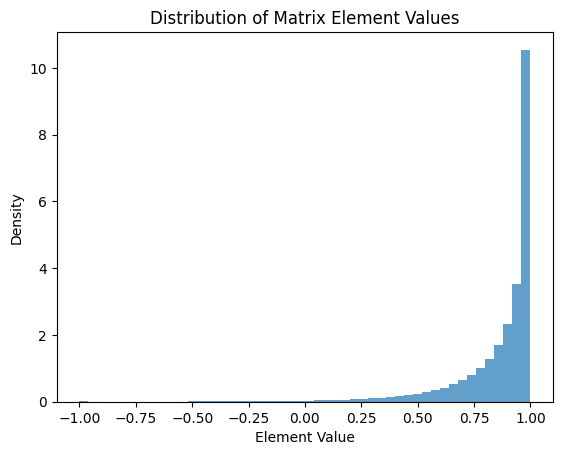

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
full_ls = []
for sub in subs:
    full_ls += list(pre_perm[sub])
flattened_values = np.concatenate([matrix.flatten() for matrix in full_ls])
# Plot histogram
plt.hist(flattened_values, bins=50, density=True, alpha=0.7)
plt.title('Distribution of Matrix Element Values')
plt.xlabel('Element Value')
plt.ylabel('Density')
plt.show()


In [ ]:
importlib.reload(graphs_regressionCV)
importlib.reload(main_con)
n_iter = 10
subjects = data.subjects
graphs = main_con.connectome_analyses(data,fdict, atlas_labels,  save_to = save_to, n_iter=n_iter)
pre_graphs = graphs['pre_graphs']
post_graphs = graphs['post_graphs']
rand_pre = graphs['randCon_pre']
permNames = [f"perm_{i}" for i in range(n_iter)]

---RANDOMIZATION OF CONNECTOMES---
---checking rand matrices distribution---
---Saving edges weights distribution
---Saving edges weights distribution


Trasnform rand matrices to graphs

In [145]:
graphs.keys()

dict_keys(['pre_graphs', 'post_graphs', 'randCon_pre', 'randCon_post'])

In [157]:
connectomes = graphs['randCon_pre']
len(list(connectomes.values()))
type(rand_post_dfs)
graphs.keys()
graphs['randCon_nodeChange_dfs']


In [158]:
importlib.reload(graphs_regressionCV)
importlib.reload(main_con)   
tmp_randPre = dict()
#for sub in subjects:
graphs['randCon_nodeChange_dfs'] = dict()
for sub in subjects:
    subi_rand_pre, _, _ = graphs_regressionCV.compute_graphs_metrics(graphs['randCon_pre'][sub], permNames, atlas_labels, out_type='dict')
    #rand_pre_graphs[sub] = subi_rand_pre  # But here the list is for one sub (list of rand mat)
    subi_rand_post,_,_ = graphs_regressionCV.compute_graphs_metrics(graphs['randCon_post'][sub], permNames, atlas_labels, out_type='dict')
    #rand_post_graphs[sub] = subi_rand_post
    # Graph to dataframe/n_permut
    rand_pre_dfs, ids = graphs_regressionCV.node_attributes2df(subi_rand_pre, node_metrics)
    rand_post_dfs, ids = graphs_regressionCV.node_attributes2df(subi_rand_post, node_metrics)

    # Compute diff directly on each permuted graphs_dfs/sub
    graphs['randCon_nodeChange_dfs'][sub] = graphs_regressionCV.node_metric_diff(rand_post_dfs,rand_pre_dfs, node_metrics)

Compute distributions a p values

In [ ]:
for sub in subjects:
    dist = graph['randCon_nodeChange_dfs'][sub]
    change = 

In [132]:
for sub, g in gpre.items():
    for node in g.nodes:
        for metric in g.nodes[node]:
            print(sub, g)


    

perm_0 Graph with 61 nodes and 1891 edges
perm_0 Graph with 61 nodes and 1891 edges
perm_0 Graph with 61 nodes and 1891 edges
perm_0 Graph with 61 nodes and 1891 edges
perm_0 Graph with 61 nodes and 1891 edges
perm_0 Graph with 61 nodes and 1891 edges
perm_0 Graph with 61 nodes and 1891 edges
perm_0 Graph with 61 nodes and 1891 edges
perm_0 Graph with 61 nodes and 1891 edges
perm_0 Graph with 61 nodes and 1891 edges
perm_0 Graph with 61 nodes and 1891 edges
perm_0 Graph with 61 nodes and 1891 edges
perm_0 Graph with 61 nodes and 1891 edges
perm_0 Graph with 61 nodes and 1891 edges
perm_0 Graph with 61 nodes and 1891 edges
perm_0 Graph with 61 nodes and 1891 edges
perm_0 Graph with 61 nodes and 1891 edges
perm_0 Graph with 61 nodes and 1891 edges
perm_0 Graph with 61 nodes and 1891 edges
perm_0 Graph with 61 nodes and 1891 edges
perm_0 Graph with 61 nodes and 1891 edges
perm_0 Graph with 61 nodes and 1891 edges
perm_0 Graph with 61 nodes and 1891 edges
perm_0 Graph with 61 nodes and 189

In [144]:
def node_attributes2df(Gs, subjects, node_metrics):

    ls_df = []
    for _, G in Gs.items():
        nan_array = np.full((len(G.nodes), len(node_metrics)), np.nan)
        df = pd.DataFrame(nan_array, index=G.nodes, columns=node_metrics)

        for node in G.nodes:
            attributes = G.nodes[node] #dict for node i{'metric1' : int., 'm2':int.}

            for metric in node_metrics: # for node i, fix columns with metric
                df.loc[node, metric] = attributes[metric]

        ls_df.append(df)
        
    return ls_df

def node_metric_diff(post_df, pre_df, subjects):

    change_dfs = []
    for i, sub in enumerate(subjects):
        assert list(post_df[i].columns) == list(pre_df[i].columns)

        temp_df = post_df[i].copy(deep=True)
        temp_df = post_df[i] - pre_df[i]
        change_dfs.append(temp_df)

    return change_dfs


In [139]:
node_metrics = ['strength','strengthnorm', 'eigenCent', 'betCentrality', 'degCentrality', 'clustering', 'localEfficiency']
dfs = node_attributes2df(gpre, subjects, node_metrics)
dfs

[                                    strength  strengthnorm  eigenCent  \
 Superior frontal sulcus            57.262196      0.954370   0.130541   
 Fusiform gyrus                     58.832206      0.980537   0.134399   
 Calcarine cortex posterior         58.621170      0.977019   0.133945   
 Cingulate cortex posterior         56.210966      0.936849   0.128496   
 Parieto-occipital sulcus superior  51.820914      0.863682   0.117719   
 ...                                      ...           ...        ...   
 Cuneus                             58.606873      0.976781   0.133766   
 Middle temporal gyrus              58.670475      0.977841   0.133922   
 Superior frontal gyrus             57.509351      0.958489   0.131451   
 Central sulcus                     57.055508      0.950925   0.130421   
 Caudate                            58.163465      0.969391   0.132927   
 
                                    betCentrality  degCentrality  clustering  \
 Superior frontal sulcus      

In [ ]:
tmp_randPre = dict()
    tmp_randPost = dict()
    for sub in data.subjects:
        tmp_randPre[sub] = graphsCV.compute_graphs_metrics(graphs['randCon_pre'], permNames, atlas_labels, out_type='list')
        tmp_randPost[sub] = graphsCV.compute_graphs_metrics(graphs['randCon_post'], permNames, atlas_labels, out_type='list')
    graphs['pre_hqs_graph'] = tmp_randPre
    graphs['post_hqs_graph'] = tmp_randPost

In [ ]:
# Get the basic structure and dimensions of the keys
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", G.nodes())
print("Edges:", G.edges())

### Edge density plot

In [ ]:
# plot heatmap
#plt.figure(figsize = (20, 20))
#_ = sns.heatmap(A, cmap='coolwarm', cbar=True, square=False, mask=None)
matrix = A
matrixdiagNaN = matrix.copy()
np.fill_diagonal(matrixdiagNaN,np.nan)

# Weight distribution plot
bins = np.arange(np.sqrt(len(np.concatenate(matrix))))
bins = (bins - np.min(bins))/np.ptp(bins)
fig, axes = plt.subplots(1,2, figsize=(15,5))

# Distribution of raw weights
rawdist = sns.distplot(matrixdiagNaN.flatten(), bins=bins, kde=False, ax=axes[0], norm_hist=True)
rawdist.set(xlabel='Correlation Values', ylabel = 'Density Frequency')

# Probability density of log10
log10dist = sns.distplot(np.log10(matrixdiagNaN).flatten(), kde=False, ax=axes[1], norm_hist=True)
log10dist.set(xlabel='log(weights)')

## Metrics

In [ ]:
import pygsp
G_fd = pygsp.graphs.Graph(A)
G_fd.compute_laplacian(lap_type="normalized")
G_fd.compute_fourier_basis()  # compute connectome harmonics

### Efficiency

In [ ]:

nx.global_efficiency(G)  # this gives efficiency for node 2 and 3


### Degree/Strength

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting

# Compute the degree of the graph
degree = dict(G.degree(weight='weight'))

# Sort the nodes by degree (highest to lowest)
sorted_degree = sorted(degree.items(), key=lambda x: x[1], reverse=True)

# Get the highest 5% of nodes and their degree values
top_5_percent = int(len(sorted_degree) * 0.05)
highest_nodes = sorted_degree[:top_5_percent]

# Print all nodes and their degree values
print("Nodes sorted by degree (highest to lowest):")
for node_label, deg in sorted_degree:
    print(f"{node_label}: {deg}")

# Print the threshold value
threshold = highest_nodes[-1][1]
print(f"Threshold (highest 5%): {threshold}")

# Degree Histogram
sns.distplot(list(degree.values()), kde=False, norm_hist=False)
plt.xlabel('Degree Values')
plt.ylabel('Counts')

# Plot the highest 5% values on the histogram
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold (highest 5%)')
plt.legend()
plt.show()

# Plot the graph with degree values as the node markers
coords = plotting.find_probabilistic_atlas_cut_coords(atlas) 

# Plot the marker plot with all nodes
plt.figure(figsize=(8, 6))
plotting.plot_markers([degree[node] for node in G.nodes], coords, title='Node densities (correlation estim.) - All Nodes')
plt.show()

# Replace degree values below threshold with 0
for node_label, deg in degree.items():
    if deg < threshold:
        degree[node_label] = 0

# Plot the marker plot with only nodes above the threshold
plt.figure(figsize=(8, 6))
plotting.plot_markers([degree[node] for node in G.nodes], coords, title='Node densities (correlation estim.) - Nodes above Threshold')
plt.show()


In [ ]:
# degree
#Vertex degree quantifies the total number of vertex connections in an undirected binary network (Fornito et al. 2016)
G.degree(weight='weight')
strength = G.degree(weight='weight')
strengths = {node: val for (node, val) in strength}
nx.set_node_attributes(G, dict(strength), 'strength') # Add as nodal attribute

# Normalized node strength values 1/N-1
normstrenghts = {node: val * 1/(len(G.nodes)-1) for (node, val) in strength}
nx.set_node_attributes(G, normstrenghts, 'strengthnorm') # Add as nodal attribute

# Computing the mean degree of the network
normstrengthlist = np.array([val * 1/(len(G.nodes)-1) for (node, val) in strength])
mean_degree = np.sum(normstrengthlist)/len(G.nodes)
print('mean_degree :', mean_degree)
print(strengths)


### closeness

In [ ]:
# The function accepts a argument 'distance' that, in correlation-based networks, must be seen as the inverse ... 
# of the weight value. Thus, a high correlation value (e.g., 0.8) means a shorter distance (i.e., 0.2).
G_distance_dict = {(e1, e2): 1 / abs(weight) for e1, e2, weight in G.edges(data='weight')}

# Then add them as attributes to the graph edges
nx.set_edge_attributes(G, G_distance_dict, 'distance')

# Computation of Closeness closeness
closeness = nx.closeness_closeness(G, distance='distance')

# Now we add the closeness closeness value as an attribute to the nodes
nx.set_node_attributes(G, closeness, 'closecent')

# Closeness closeness Histogram
sns.distplot(list(closeness.values()), kde=False, norm_hist=False)
plt.xlabel('closeness Values')
plt.ylabel('Counts')

plotting.plot_markers([closeness[key] for key in sorted(closeness.keys())], coords)

print(['{} : {}'.format(node, G.nodes[node]['closecent']) for node in G.nodes if G.nodes[node]['closecent'] > 0.135])

Clossness closeness

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting

# The function accepts a argument 'distance' that, in correlation-based networks, must be seen as the inverse ... 
# of the weight value. Thus, a high correlation value (e.g., 0.8) means a shorter distance (i.e., 0.2).
G_distance_dict = {(e1, e2): 1 / abs(weight) for e1, e2, weight in G.edges(data='weight')}

# Then add them as attributes to the graph edges
nx.set_edge_attributes(G, G_distance_dict, 'distance')

# Computation of Closeness closeness
closeness = nx.closeness_closeness(G, distance='distance')

# Now we add the closeness closeness value as an attribute to the nodes
nx.set_node_attributes(G, closeness, 'closecent')

# Sort the nodes by closeness closeness (highest to lowest)
sorted_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)

# Get the highest 5% of nodes and their closeness values
top_5_percent = int(len(sorted_closeness) * 0.05)
highest_nodes = sorted_closeness[:top_5_percent]

# Print all nodes and their closeness closeness values
print("Nodes sorted by closeness closeness (highest to lowest):")
for node_label, closeness in sorted_closeness:
    print(f"{node_label}: {closeness}")

# Print the threshold value
threshold = highest_nodes[-1][1]
print(f"Threshold (highest 5%): {threshold}")

# Closeness closeness Histogram
sns.distplot(list(closeness.values()), kde=False, norm_hist=False)
plt.xlabel('closeness Values')
plt.ylabel('Counts')

# Plot the highest 5% values on the histogram
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold (highest 5%)')
plt.legend()
plt.show()

# Plot the graph with closeness closeness values as the node markers
coords = plotting.find_probabilistic_atlas_cut_coords(atlas) 

# Plot the marker plot with all nodes
plt.figure(figsize=(8, 6))
plotting.plot_markers([closeness[node] for node in G.nodes], coords, title='Node densities (correlation estim.) - All Nodes')
plt.show()

# Replace closeness values below threshold with 0
for node_label, closeness in closeness.items():
    if closeness < threshold:
        closeness[node_label] = 0

# Plot the marker plot with only nodes above the threshold
plt.figure(figsize=(8, 6))
plotting.plot_markers([closeness[node] for node in G.nodes], coords, title='Node densities (correlation estim.) - Nodes above Threshold')
plt.show()


### Distance and shortest path

"The shortest path is the path with the least number of edges (or least total weight) between two vertices in a network. In a weighted graph, the shortest path is calculated by the minimum sum of the weights of edges between two vertices (Fornito et al. 2016). 
he weights must be converted to ‘distance’ by computing the inverse of the original weight (1−weight or 1weight); a higher correlation value represents a shorter distance (Fornito et al. 2016)"(Centeno,2022)

In [ ]:
# Distance
dist_dict = {(e1,e2): 1/abs(weight) for e1,e2 ,weight in G.edges.data('weight')}
nx.set_edge_attributes(G, dist_dict,'distance')

# Shortest path
short_path = dict(nx.all_pairs_dijkstra_path_length(G, weight='distance'))

In [ ]:
short_path

### *Clustering coefficient
The clustering coefficient assesses the tendency for any two neighbours of a vertex to be directly connected (or more strongly connected in the weighted case) to each other and can also be termed cliquishness (Hallquist and Hillary 2018)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting

# Clustering Coefficient Calculation
clustering = nx.clustering(G, weight='weight')
nx.set_node_attributes(G, clustering, 'cc')

# Sort the nodes by clustering coefficient (highest to lowest)
sorted_clustering = sorted(clustering.items(), key=lambda x: x[1], reverse=True)

# Get the highest 5% of nodes and their clustering coefficients
top_5_percent = int(len(sorted_clustering) * 0.05)
highest_nodes = sorted_clustering[:top_5_percent]

# Print all nodes and their clustering coefficients
print("Nodes sorted by clustering coefficient (highest to lowest):")
for node_label, cc in sorted_clustering:
    print(f"{node_label}: {cc}")

# Print the threshold value
threshold = highest_nodes[-1][1]
print(f"Threshold (highest 5%): {threshold}")

# Clustering Coefficient Histogram
plt.figure(figsize=(8, 6))
sns.distplot(list(clustering.values()), kde=False, norm_hist=False)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Counts')
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold (highest 5%)')
plt.legend()
plt.title('Clustering Coefficient Distribution')
plt.show()

# Plot the graph with clustering coefficients as the node markers
coords = plotting.find_probabilistic_atlas_cut_coords(atlas) 

# Plot the marker plot with all nodes
plt.figure(figsize=(8, 6))
plotting.plot_markers([clustering[node] for node in G.nodes], coords, title='Node Clustering Coefficients - All Nodes')
plt.show()

# Replace clustering coefficients values below threshold with 0
for node_label, cc in clustering.items():
    if cc < threshold:
        clustering[node_label] = 0

# Plot the marker plot with only nodes above the threshold
plt.figure(figsize=(8, 6))
plotting.plot_markers([clustering[node] for node in G.nodes], coords, title='Node Clustering Coefficients - Nodes above Threshold')
plt.show()


### ? *Modularity


In [ ]:
#part = nx.community.best_partition(G, weight='weight') # Louvain algorithm
from networkx import community
#part = community.best_partition(G, weight='weight')

# check number of communities
#set(part.values()).union()
communities_generator = nx.community.girvan_newman(G)
top_level_communities = next(communities_generator)
nx.community.modularity(G, top_level_communities)
top_level_communities


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Your code to generate the communities
communities_generator = nx.community.girvan_newman(G)
top_level_communities = next(communities_generator)
modularity = nx.community.modularity(G, top_level_communities)

# Create a dendrogram of the community structure
dendrogram = sch.dendrogram(sch.linkage(nx.to_numpy_array(G), method='ward'))

# Set plot labels and title
plt.xlabel('Nodes')
plt.ylabel('Distance')
plt.title('Dendrogram of Community Structure')

# Show the plot
plt.show()

# Create a bar plot to show the modularity of each community
community_modularities = [nx.community.modularity(G, community) for community in top_level_communities]
community_labels = [f'Community {i + 1}' for i in range(len(top_level_communities))]

plt.bar(community_labels, community_modularities)
plt.xlabel('Community')
plt.ylabel('Modularity')
plt.title('Modularity of Top-Level Communities')
plt.xticks(rotation=45)

# Show the plot
plt.show()


### Visualization

## Clustering

In [ ]:
lcc = nx.clustering(G, weight='weight')

In [ ]:
# minimum spanning tree
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting

# Compute the minimum spanning tree
mst = nx.minimum_spanning_tree(G, weight='weight')

# Plot the MST on the brain template
coords = plotting.find_probabilistic_atlas_cut_coords(atlas) 

plt.figure(figsize=(8, 6))
plotting.plot_connectome(adjacency_matrix=nx.to_numpy_array(mst),
                         node_coords=coords,
                         node_color='skyblue',
                         edge_cmap='coolwarm',
                         edge_threshold='98%',
                         title='Minimum Spanning Tree (MST)')
plt.show()
